In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
#
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

# 1 time varied effect

In [26]:
df=pd.read_csv(r'data\panel_1_time_varied_effect.csv')

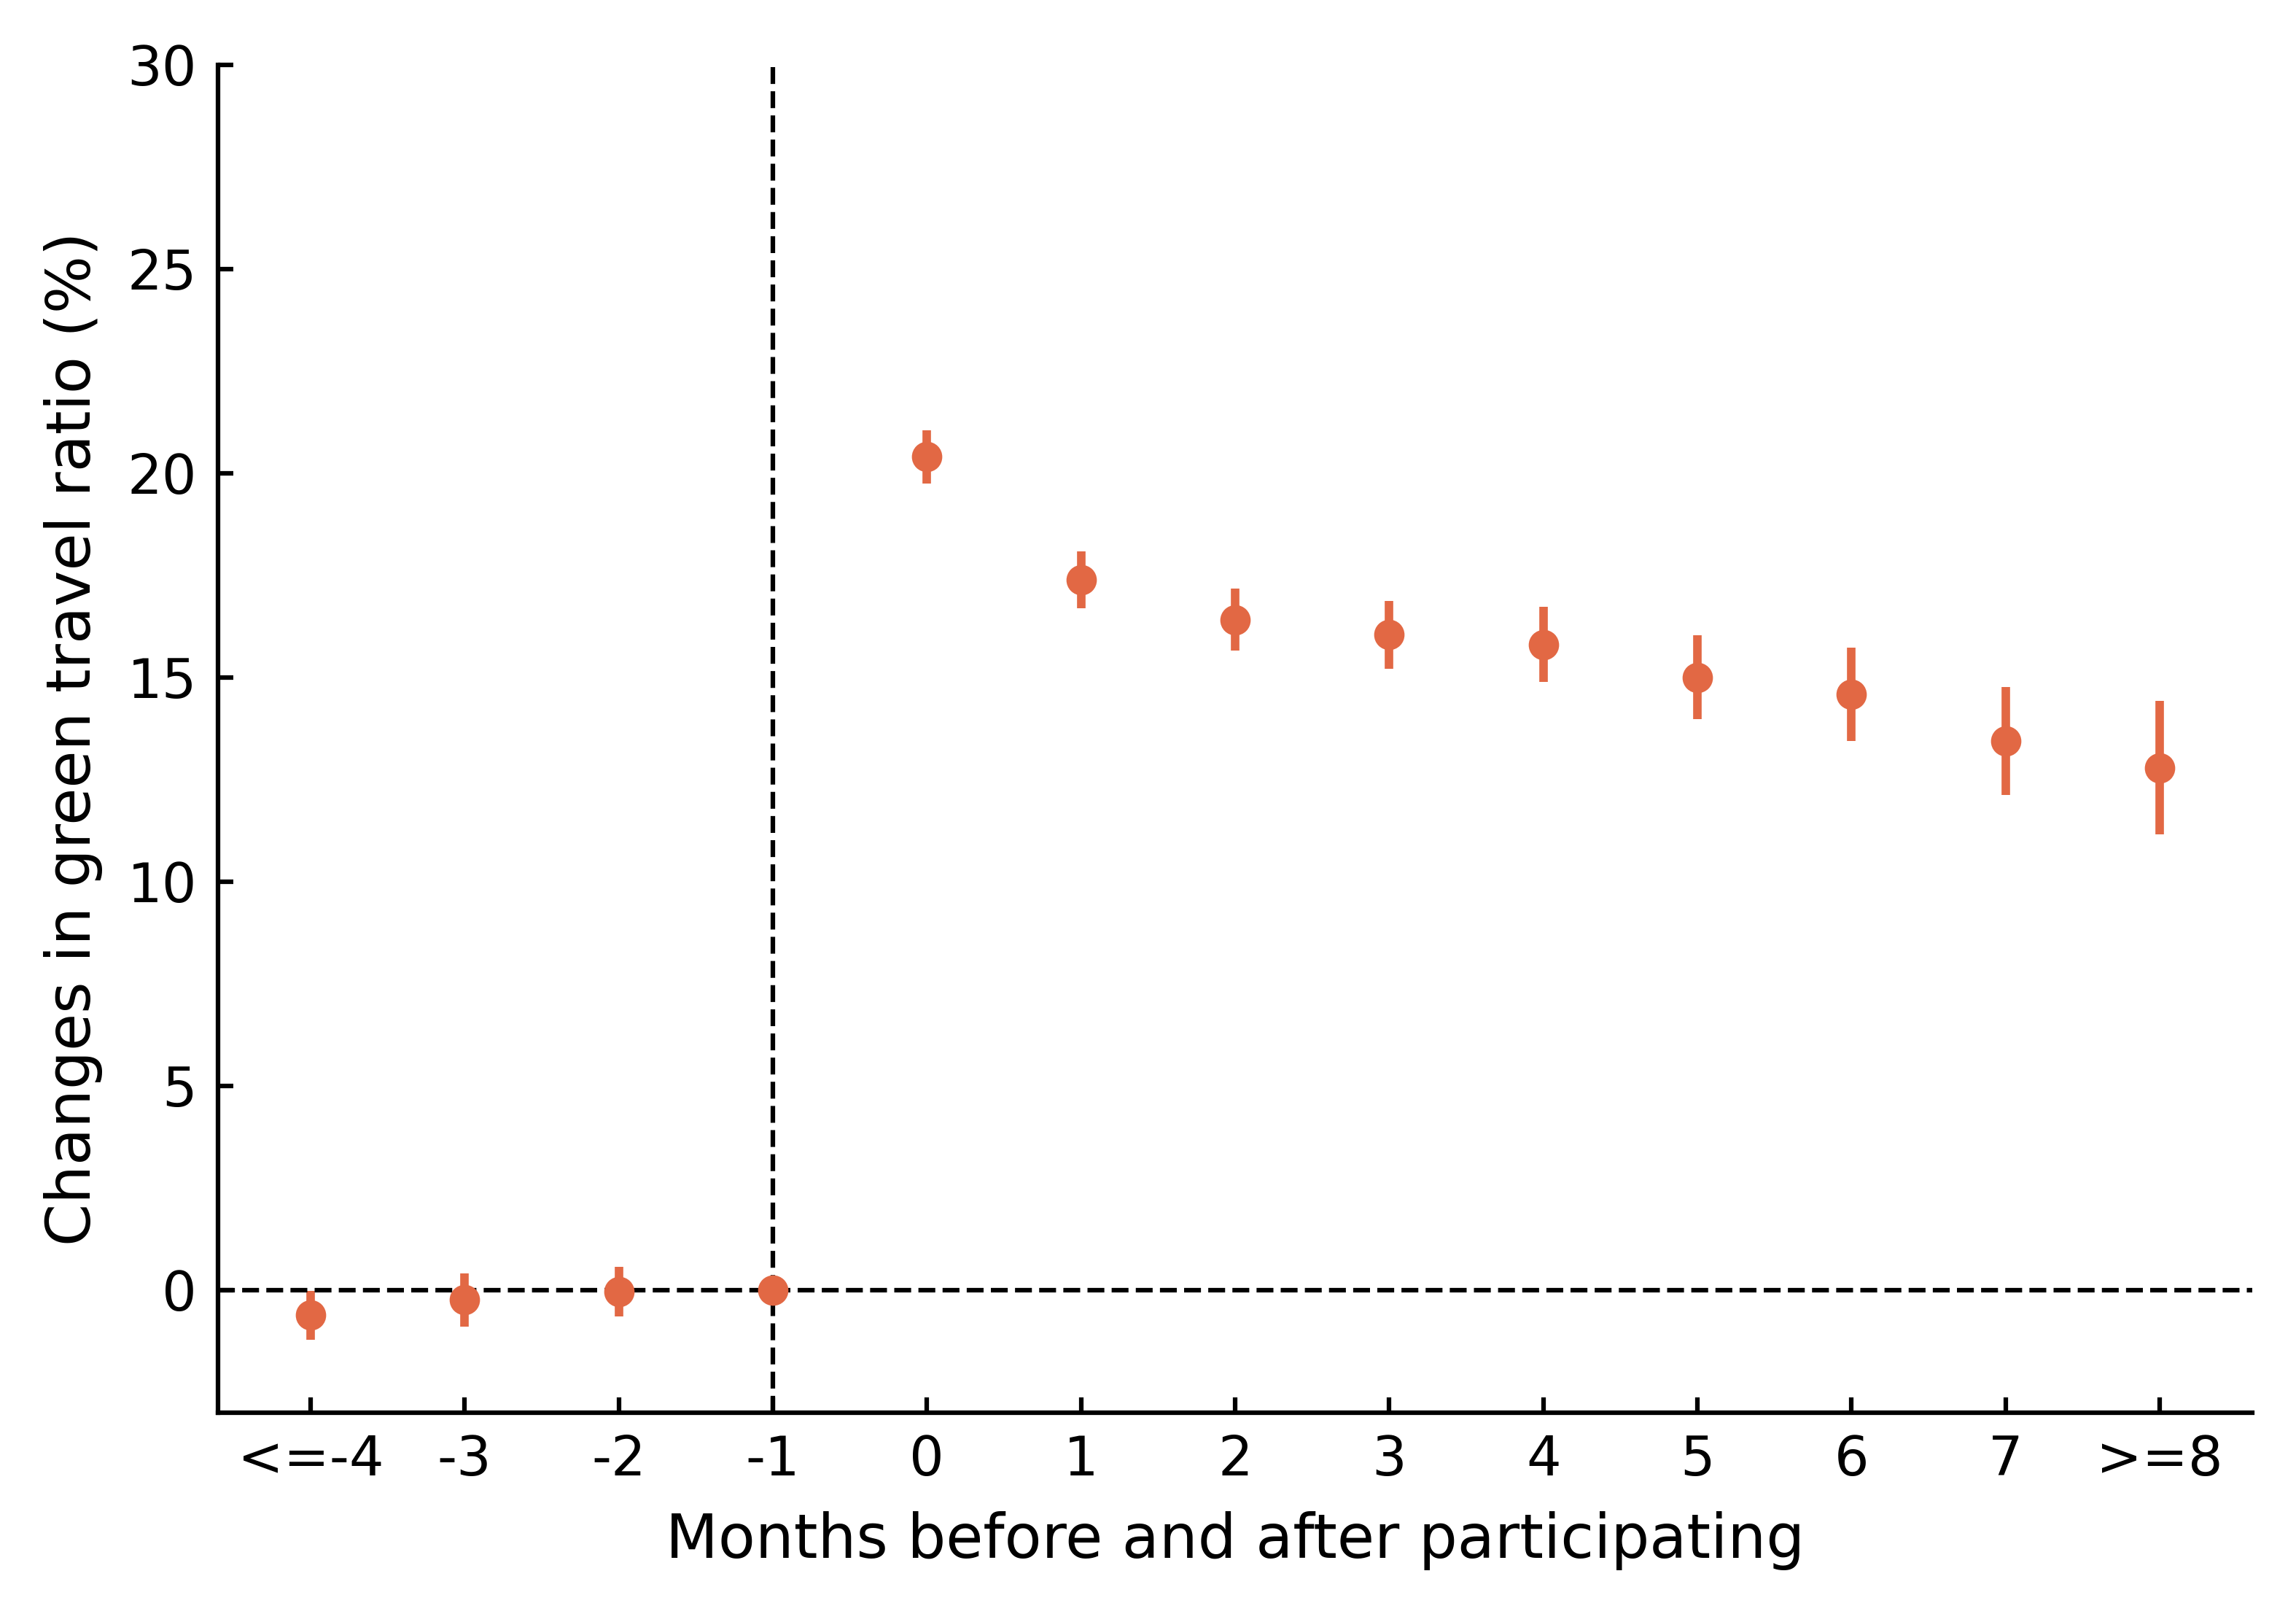

In [27]:

fig, ax = plt.subplots(figsize=(6,4),dpi=600)
plt.rcdefaults()
# plt.style.use('seaborn-whitegrid') 
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.75
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


# df=df.drop(index=0)


ax.errorbar(df['vars'], df['Parameter'], 
            yerr=[np.array(df['Parameter']) - np.array(df['Lower CI']), 
                  np.array(df['Upper CI']) - np.array(df['Parameter'])], 
            fmt='.', color='#E26844', ecolor='#E26844', capsize=0, capthick=1.3, label='Estimated Impacts',markersize=8,linewidth=1.4,alpha=1)
# ax.plot([0,1, 2, 3, 4, 5,6,7,8,9,10,11,12],df['Parameter'],lw=0.75,linestyle='--')

# ax.legend(['95% CI'], loc=0)


ax.axhline(y=0, color='black', linestyle='--', linewidth=.75)
ax.axvline(x=3, color='black', linestyle='--', linewidth=.75)

ax.set_xlabel('Months before and after participating',fontsize=10)
#
ax.set_xticks([0,1, 2, 3, 4, 5,6,7,8,9,10,11,12])

ax.set_xticklabels(['<=-4', '-3', '-2', '-1', '0','1','2','3','4','5','6','7','>=8'],fontsize=10)
ax.set_ylim(-3,30)

ax.set_ylabel('Changes in green travel ratio (%)',fontsize=10)
#
ax.tick_params(axis='both',       
            which='major',      
            length=2.5,      
            width=0.75,          
            color='black',      
            labelsize=9,      
            direction='in')  

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
# plt.legend(fontsize=9,markerscale=.5,frameon=False)
plt.rcParams['svg.fonttype']='none'

plt.show()


# 2 Total effect

In [28]:
plot_data=pd.read_csv(r'data\panel_2_total_effect.csv')

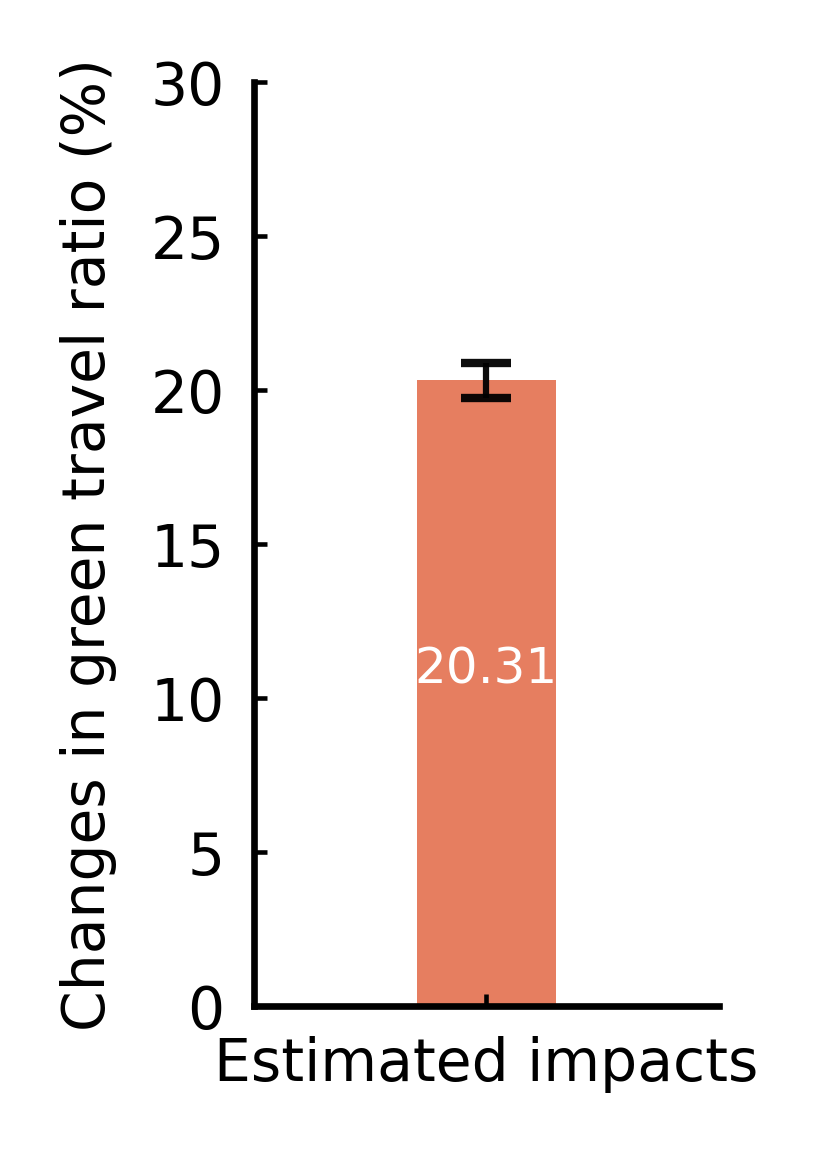

In [29]:

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(1,2),dpi=600)


# plt.style.use('seaborn-whitegrid') 
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.15
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

bars=ax.bar([0.5], plot_data['Estimate'],width=0.3, color='#E26844', 
        yerr=[[20.305- 19.733], [20.876-20.305]], capsize=3,
        error_kw={'elinewidth':0.75,'alpha':0.95,'ecolor':'black'},alpha=0.85)

ax.set_ylabel('Changes in green travel ratio (%)',fontsize=7)


ax.set_xlim(0,1)
ax.set_xticks([0.5])
ax.set_xticklabels(['Estimated impacts'],fontsize=7)

ax.set_ylim(0,30)

for bar, sig in zip(bars, [20.305]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height*0.5, 20.31,
             ha='center', va='bottom', color='white',fontsize=6)

ax.tick_params(axis='both',      
            which='major',    
            length=1.5,          
            width=0.55,         
            color='black', 
            labelsize=7,      
            direction='in')  

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
#
plt.rcParams['svg.fonttype']='none'



# 3 Gender

In [30]:
ge1=pd.read_csv(r'data\panel_c_intervention_effect_for_gender.csv')
ge1.head(2)

,vars,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI,Gender
0,treatment,21.291,0.4084,52.132,0.0,20.490,22.091,Female
1,trip_all_lable_2,16.071,0.4058,39.600,0.0,15.276,16.867,Female


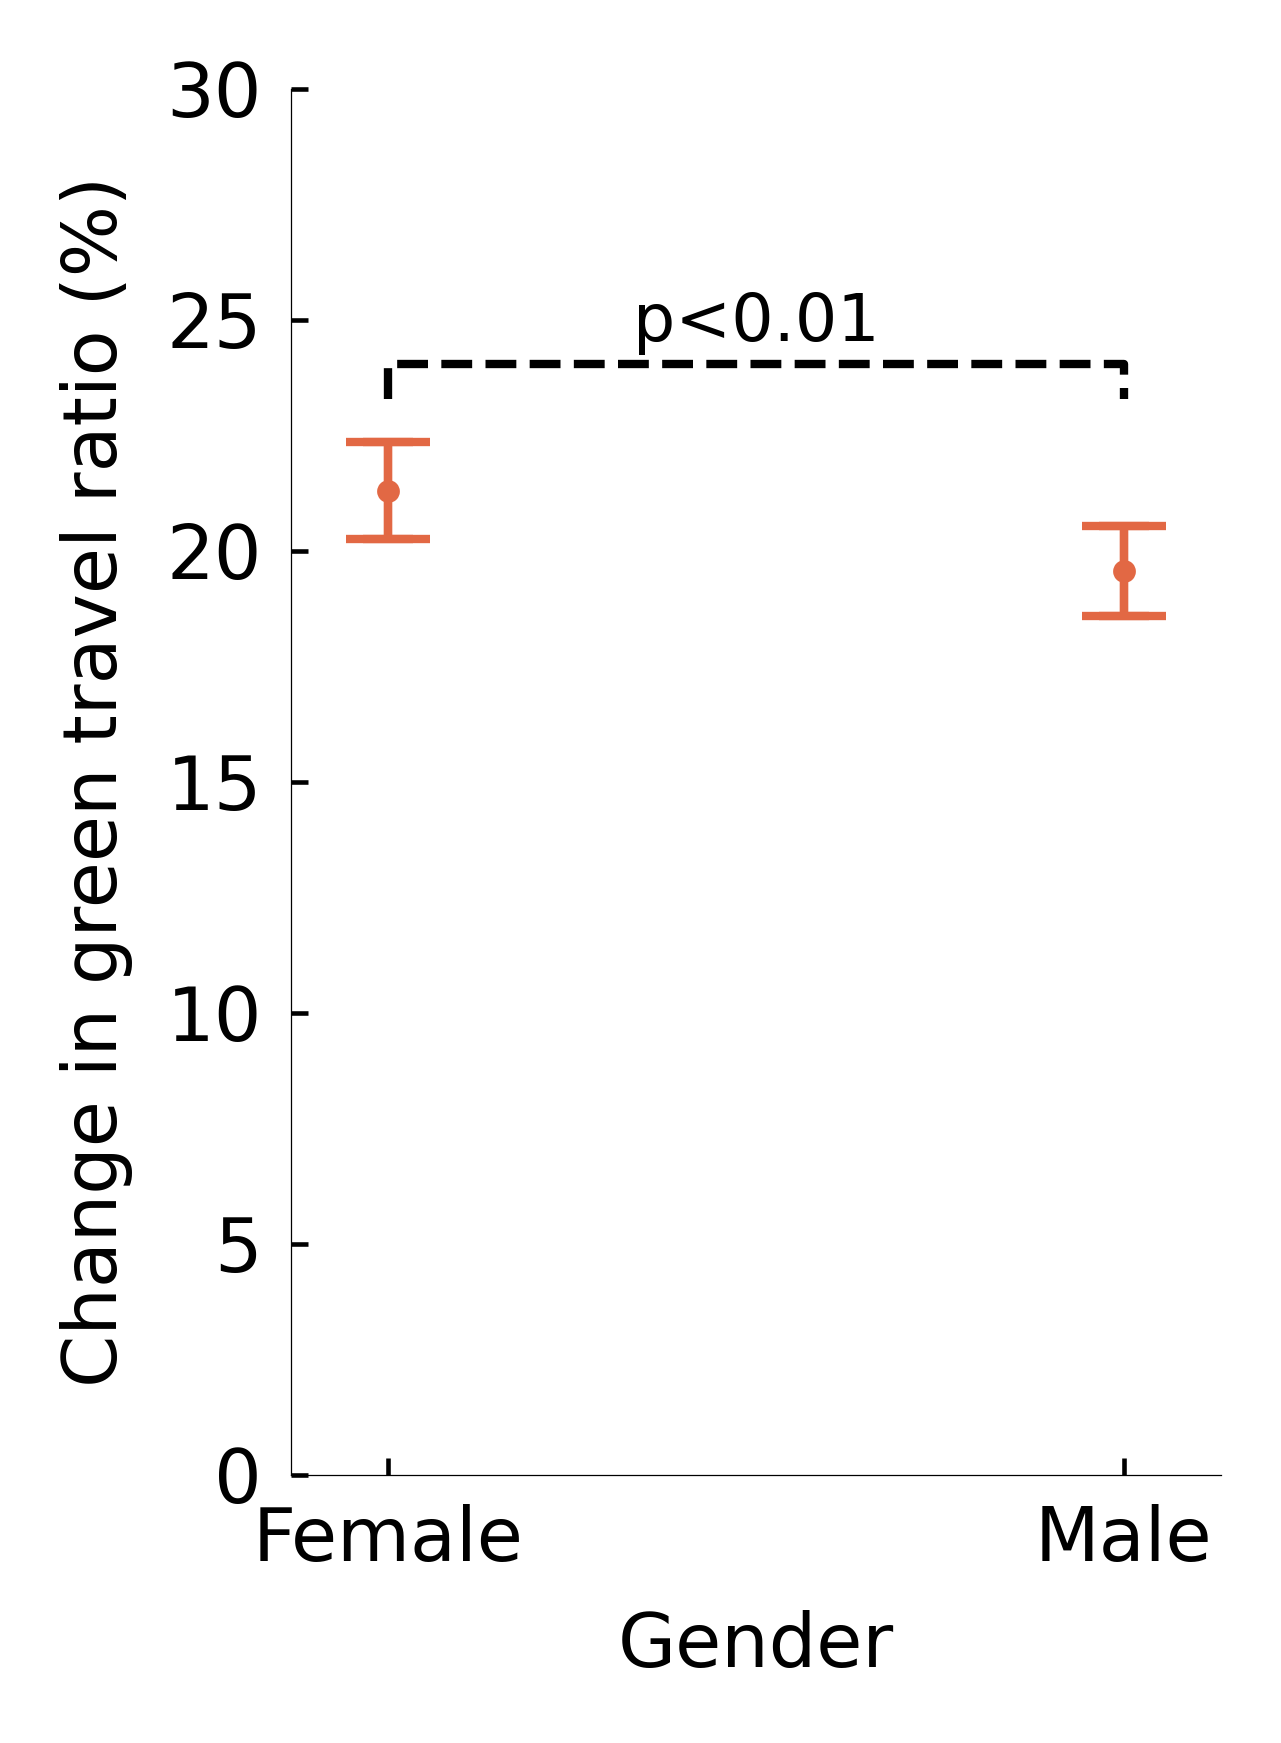

In [31]:
# &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
fig, ax = plt.subplots(figsize=(2,3),dpi=600)


plt.rcdefaults()
# plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.75
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'



df=ge1[ge1['vars']=='treatment']

categories = list(df['Gender'])
means = list(np.round(np.array(df['Parameter']),2))
upper_bounds = np.array(df['Upper CI'])+np.array([0.25,0.221])-np.array(df['Parameter'])
lower_bounds =np.array(df['Parameter'])- np.array(df['Lower CI'])+np.array([0.25,0.221])
ax.scatter(categories, means,alpha=1,s=3,color='#E26844',label='Estimated impacts')
bars = ax.bar(categories, means, yerr=[lower_bounds, upper_bounds], capsize=3,
               error_kw={'elinewidth':1,'alpha':0.95,'ecolor':'#E26844'},
               color='#E26844',width=0.15,alpha=0)
significance_levels=['***','***']
plt.errorbar(categories, means, yerr=[lower_bounds, upper_bounds],fmt='none',
             ecolor='#E26844',elinewidth=1,capsize=5,label='95% CI')
#

wz=[0,1]
y,h,col=max(means)+max(upper_bounds-lower_bounds)+2,0.75,'black'
ax.plot([0,0,1,1],[y,y+h,y+h,y],lw=1,c=col,ls='--')
ax.text((0+1)*.5,y+h+0.2,'p<0.01',ha='center',va='bottom',color=col,fontsize=8)


# Adding labels and title
ax.set_ylabel('Change in green travel ratio (%)',fontsize=9)
ax.set_xlabel("Gender",fontsize=9)
ax.tick_params(axis='x', labelsize=9) 
ax.tick_params(axis='y', labelsize=9) 
ax.set_ylim(0,30)
#
ax.tick_params(axis='both',         
            which='major',     
            length=2,           
            width=0.55,            
            color='black',       
            labelsize=9,       
            direction='in')   

ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False) 
#
plt.rcParams['svg.fonttype']='none'


plt.show()

# 3 income level

In [32]:
gee=pd.read_csv(r'data\panel_d_intervention_effect_for_income_level.csv')

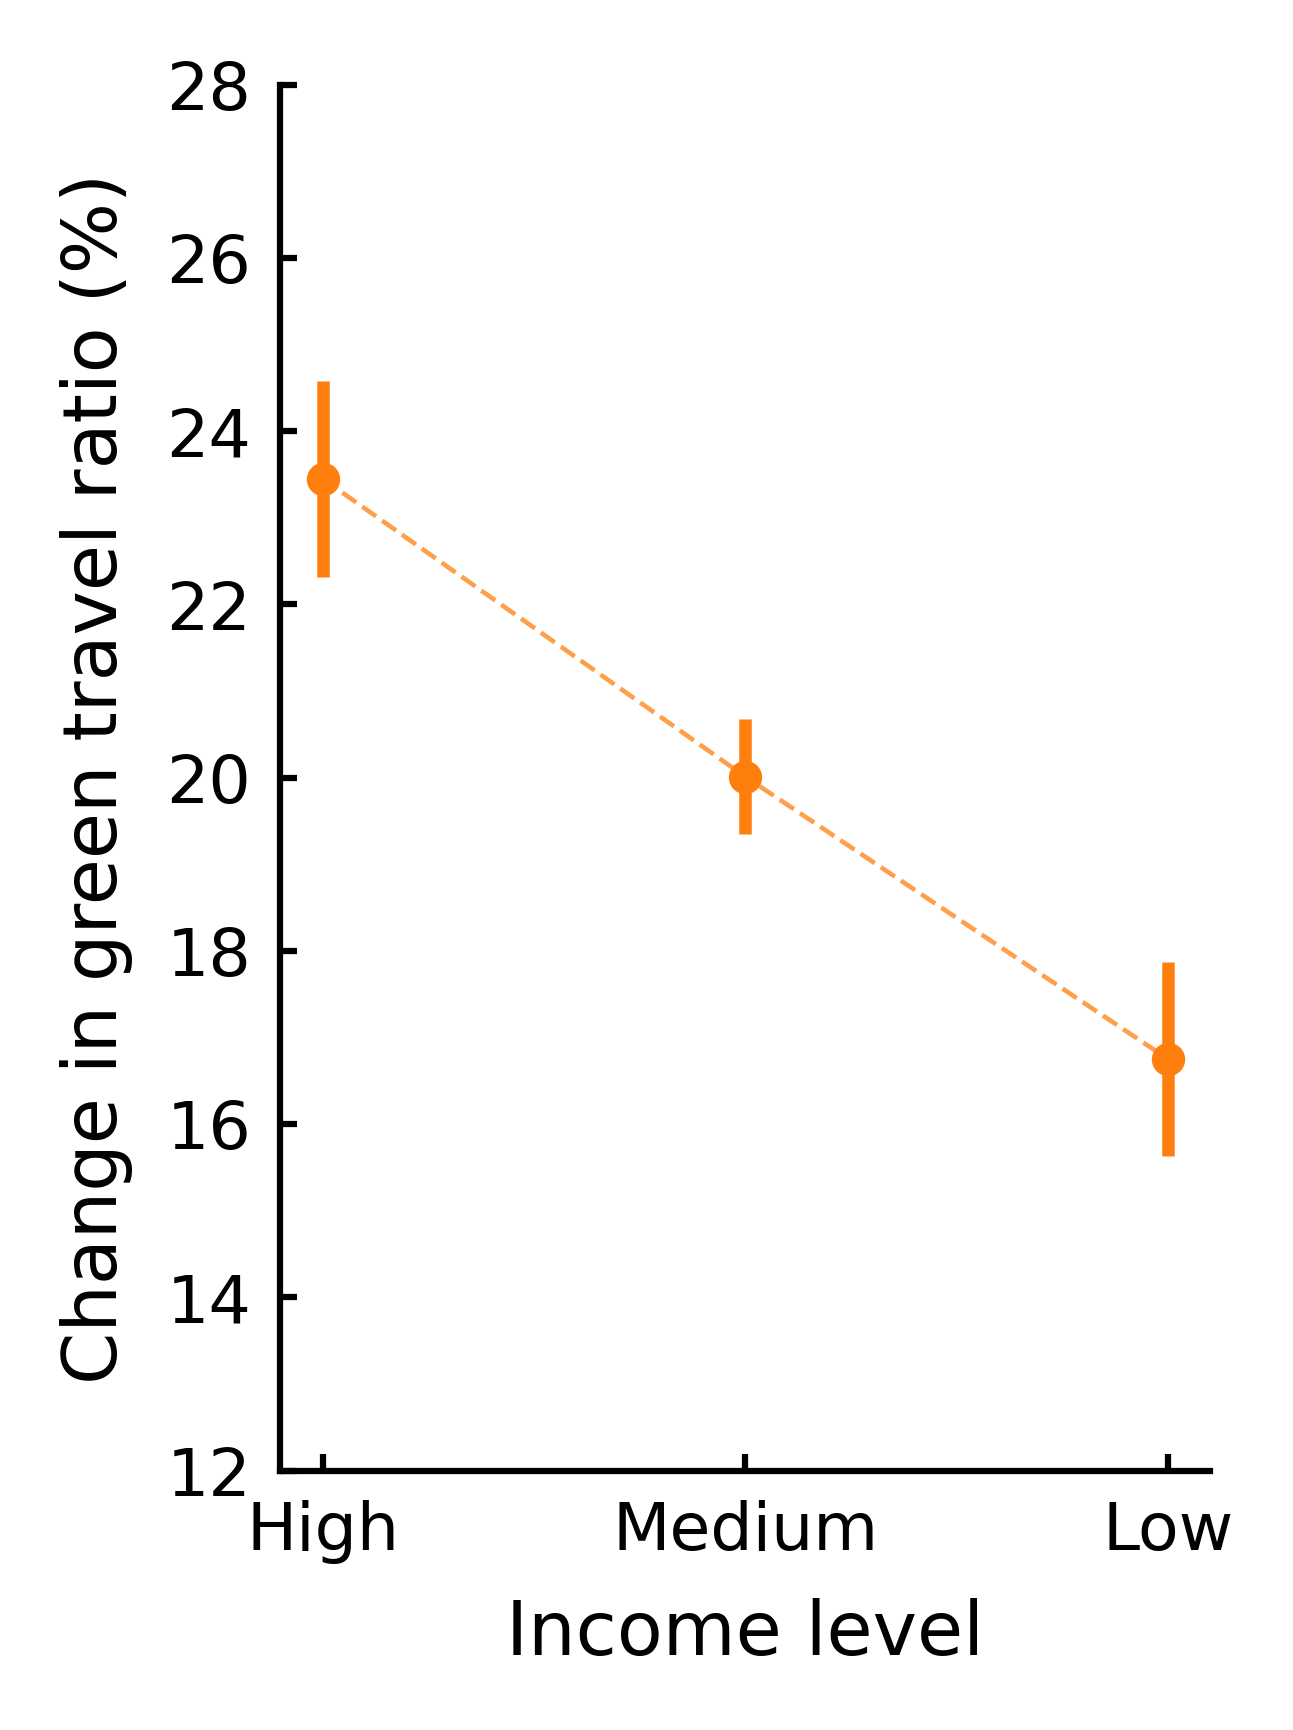

In [33]:
# &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
fig, ax = plt.subplots(figsize=(2,3),dpi=600)

plt.rcdefaults()
# plt.style.use('seaborn-whitegrid') 
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.75
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'



df=gee

df=df.reset_index(drop=True)


categories = list(df['Income'])
means = list(np.round(np.array(df['Parameter']),2))
upper_bounds = np.array(df['Upper CI'])-np.array(df['Parameter'])
lower_bounds =np.array(df['Parameter'])- np.array(df['Lower CI'])

ax.scatter(categories, means, alpha=1, s=7, color=plt.cm.tab10(1), label='Estimated impacts')
plt.errorbar(categories, means, yerr=[lower_bounds, upper_bounds], fmt='.', 
             ecolor=plt.cm.tab10(1), elinewidth=1.5, capsize=0, label='95% CI',color=plt.cm.tab10(1))




x = np.arange(len(categories))
ax.plot(x, means, linestyle='--', color=plt.cm.tab10(1),alpha=0.75,lw=0.55)

#

erros=upper_bounds-lower_bounds
groups=['High','Medium','Low']

x_positions = range(len(groups))
y, h, col = max(means) + max(erros) + 5, 0.75, 'black'

# Adding labels and title
ax.set_ylabel('Change in green travel ratio (%)',fontsize=9)
ax.set_xlabel("Income level",fontsize=9)
ax.tick_params(axis='x', labelsize=9)  
ax.tick_params(axis='y', labelsize=9)  
ax.set_ylim(12,28)
#
ax.tick_params(axis='both',     
            which='major',  
            length=2,        
            width=0.75,         
            color='black',        
            labelsize=8,         
            direction='in')   

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 


plt.rcParams['svg.fonttype']='none'


plt.show()

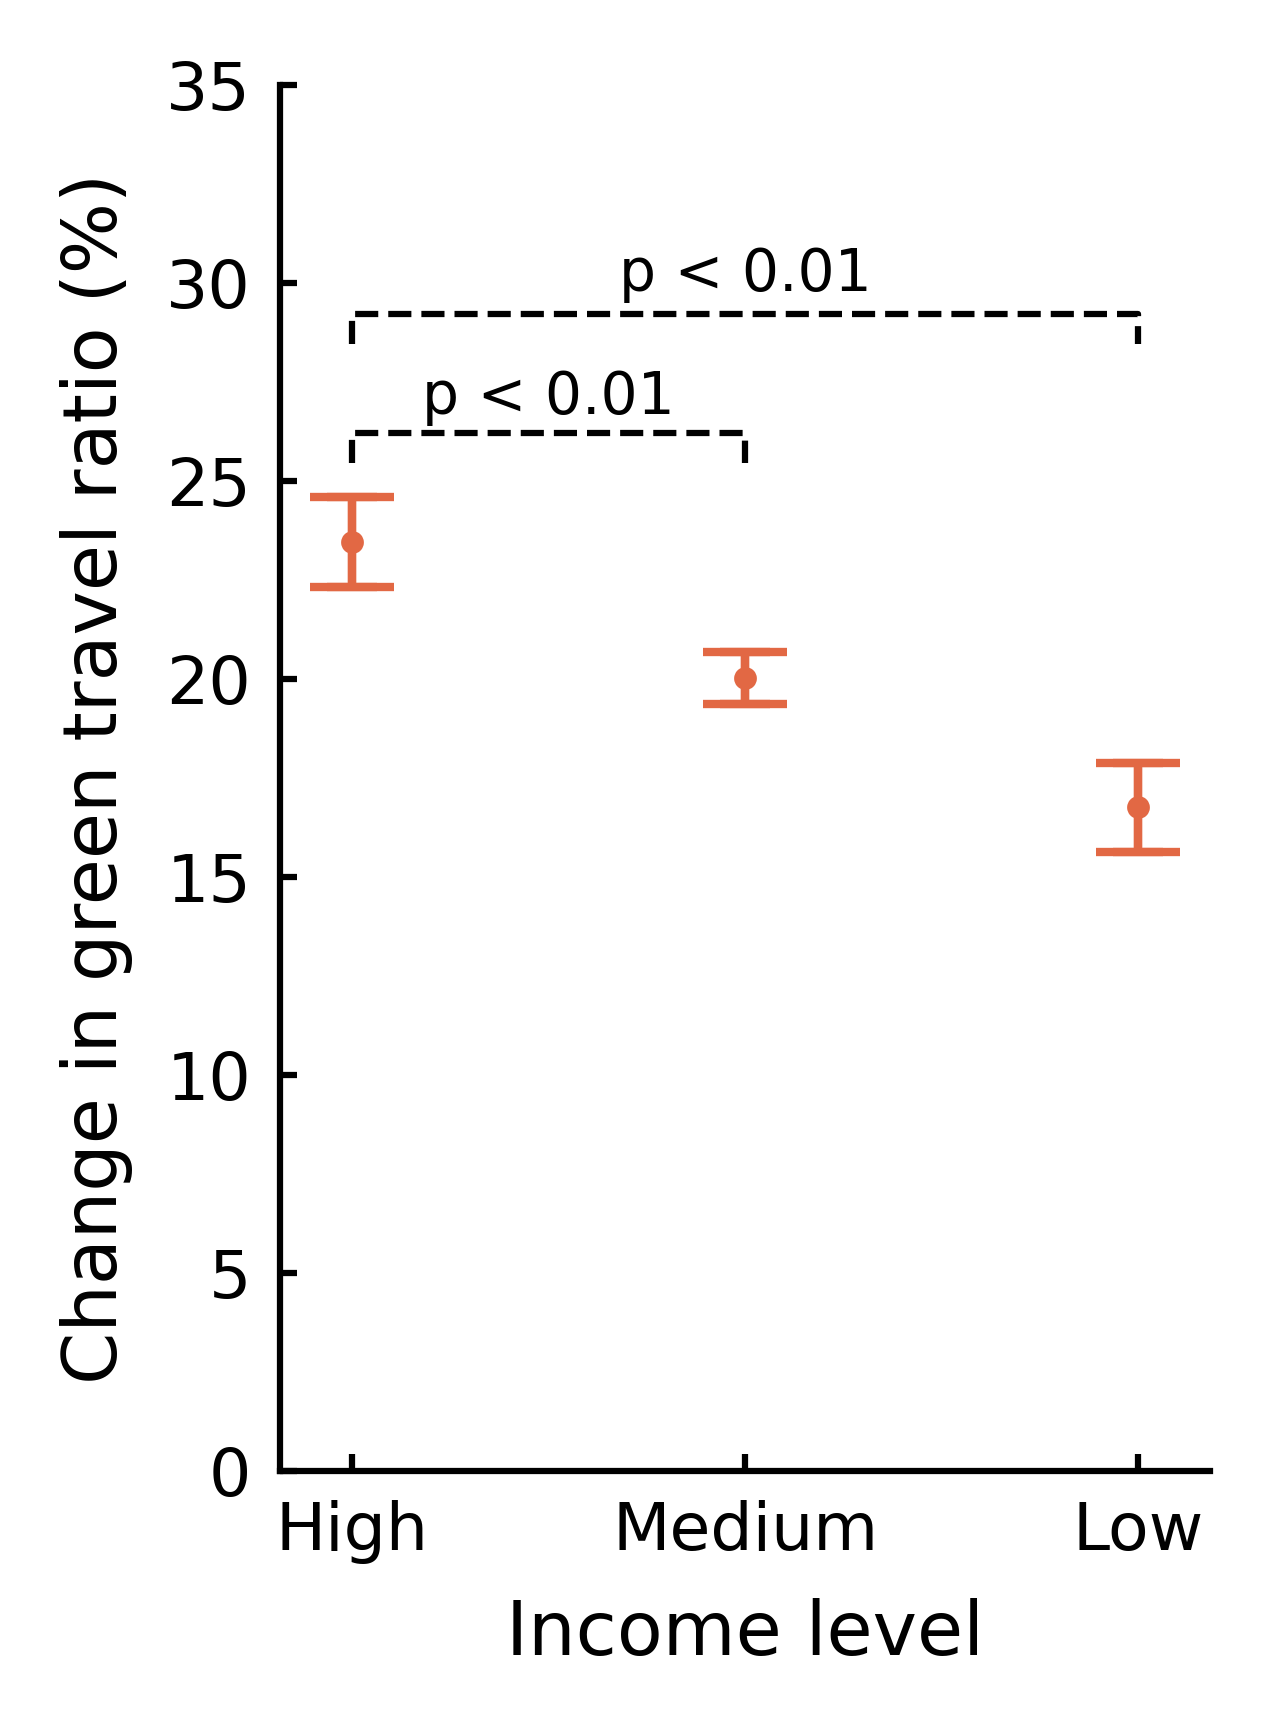

In [34]:
# &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
fig, ax = plt.subplots(figsize=(2,3),dpi=600)


plt.rcdefaults()

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.75
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'



df=gee

df=df.reset_index(drop=True)


categories = list(df['Income'])
means = list(np.round(np.array(df['Parameter']),2))
upper_bounds = np.array(df['Upper CI'])-np.array(df['Parameter'])
lower_bounds =np.array(df['Parameter'])- np.array(df['Lower CI'])
ax.scatter(categories, means,alpha=1,s=3,color='#E26844',label='Estimated impacts')
bars = ax.bar(categories, means, yerr=[lower_bounds, upper_bounds], capsize=3,
               error_kw={'elinewidth':1,'alpha':0.95,'ecolor':'#E26844'},
               color='#E26844',width=0.15,alpha=0)

plt.errorbar(categories, means, yerr=[lower_bounds, upper_bounds],fmt='none',
             ecolor='#E26844',elinewidth=1,capsize=5,label='95% CI')
#
erros=upper_bounds-lower_bounds
groups=['High','Medium','Low']

x_positions = range(len(groups))
y, h, col = max(means) + max(erros) + 5, 0.75, 'black'
#

spc=1.5
ax.plot([x_positions[0], x_positions[0], x_positions[2], x_positions[2]], [y, y + h, y + h, y], lw=0.75, ls='--', c=col) 
ax.text((x_positions[0] + x_positions[2]) * .5, y + h+0.3, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc
ax.plot([x_positions[0], x_positions[0], x_positions[1], x_positions[1]], [yof - 2*h, yof - h, yof - h, yof - 2*h], lw=0.75, ls='--', c=col)  
ax.text((x_positions[0] + x_positions[1]) * .5, yof + h-1.3, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

# Adding labels and title
ax.set_ylabel('Change in green travel ratio (%)',fontsize=9)
ax.set_xlabel("Income level",fontsize=9)
ax.tick_params(axis='x', labelsize=9) 
ax.set_ylim(0,35)
#
ax.tick_params(axis='both',        
            which='major',        
            length=2,           
            width=0.75,         
            color='black',      
            labelsize=8,       
            direction='in')  

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 


plt.rcParams['svg.fonttype']='none'

plt.show()

# 4 Age

In [35]:
gee=pd.read_csv(r'data\panel_d_intervention_effect_for_age.csv')

In [36]:
gee

,Unnamed: 0,vars,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI,Age
0,1,treatment,30.646,3.0562,10.0280,0.0,24.653,36.640,"[19,24]"
1,1,treatment,22.693,0.5349,42.4270,0.0,21.644,23.741,"[25,29]"
2,1,treatment,20.251,0.4220,47.9890,0.0,19.424,21.078,"[30,34]"
3,1,treatment,17.981,0.5598,32.1200,0.0,16.883,19.078,"[35,39]"
4,1,treatment,15.592,1.0194,15.2950,0.0,13.594,17.591,"[40,44]"
5,1,treatment,16.143,1.9052,8.4731,0.0,12.406,19.880,"[45,49]"
6,1,treatment,16.076,1.4877,10.8060,0.0,13.159,18.993,50+


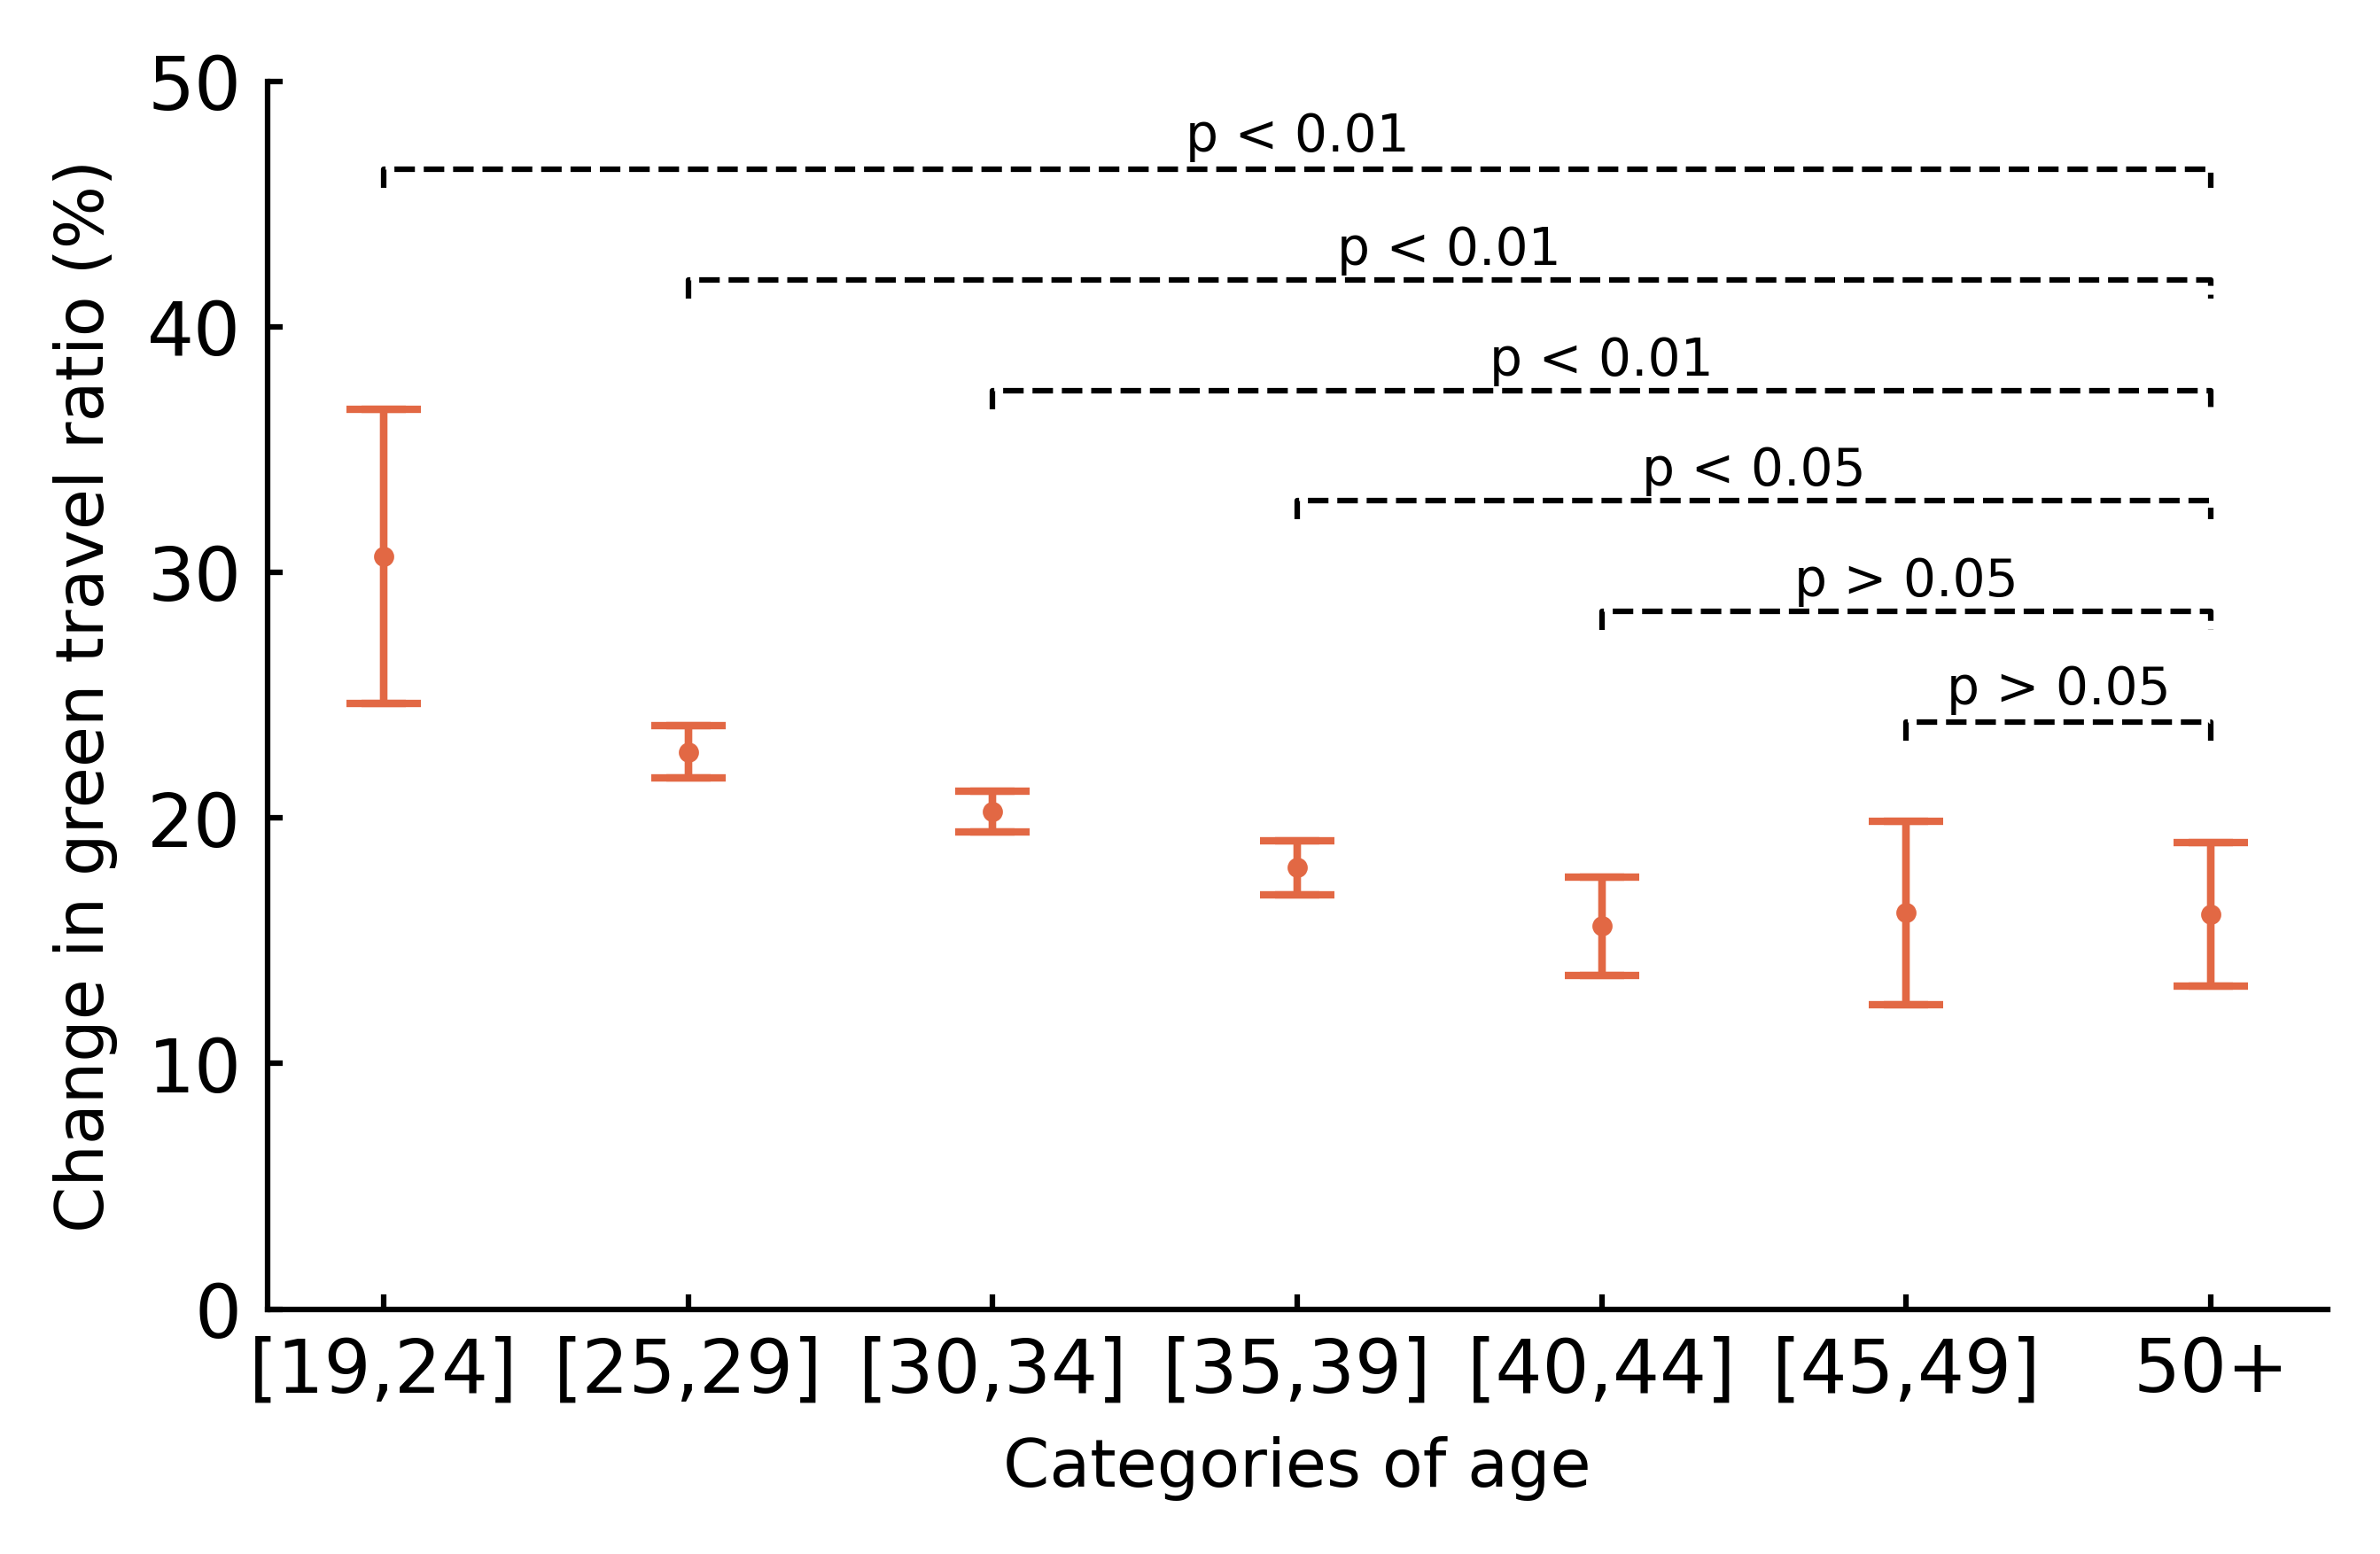

In [37]:
# &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
fig, ax = plt.subplots(figsize=(5,3),dpi=600)

plt.rcdefaults()

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.75
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


df=gee

df=df.reset_index(drop=True)

categories = list(df['Age'])
means = list(np.round(np.array(df['Parameter']),2))
upper_bounds = np.array(df['Upper CI'])-np.array(df['Parameter'])
lower_bounds =np.array(df['Parameter'])- np.array(df['Lower CI'])
ax.scatter(categories, means,alpha=1,s=3,color='#E26844',label='Estimated impacts')
bars = ax.bar(categories, means, yerr=[lower_bounds, upper_bounds], capsize=3,
               error_kw={'elinewidth':1,'alpha':0.95,'ecolor':'#E26844'},
               color='#E26844',width=0.15,alpha=0)

plt.errorbar(categories, means, yerr=[lower_bounds, upper_bounds],fmt='none',
             ecolor='#E26844',elinewidth=1,capsize=5,label='95% CI')
#
erros=upper_bounds-lower_bounds
groups=['[19,24]','[25,29]','[30,34]','[35,39]','[40,44]','[45,49]','50+']
x_positions = range(len(groups))
y, h, col = max(means) + max(erros) + 15, 0.75, 'black'  
spc=3
ax.plot([x_positions[0], x_positions[0], x_positions[6], x_positions[6]], [y, y + h, y + h, y], lw=0.75, ls='--', c=col)  
ax.text((x_positions[0] + x_positions[6]) * .5, y + h+0.3, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc
ax.plot([x_positions[1], x_positions[1], x_positions[6], x_positions[6]], [yof - 2*h, yof - h, yof - h, yof - 2*h], lw=0.75, ls='--', c=col)  
ax.text((x_positions[1] + x_positions[6]) * .5, yof + h-1.3, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc*2
ax.plot([x_positions[2], x_positions[2], x_positions[6], x_positions[6]], [yof - 4*h, yof - 3*h, yof - 3*h, yof - 4*h], lw=0.75, ls='--', c=col) 
ax.text((x_positions[2] + x_positions[6]) * .5, yof + h-2.8, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc*3
ax.plot([x_positions[3], x_positions[3], x_positions[6], x_positions[6]], [yof - 6*h, yof - 5*h, yof - 5*h, yof - 6*h], lw=0.75, ls='--', c=col)  
ax.text((x_positions[3] + x_positions[6]) * .5, yof + h-4.3, 'p < 0.05', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc*4
ax.plot([x_positions[4], x_positions[4], x_positions[6], x_positions[6]], [yof - 8*h, yof - 7*h, yof - 7*h, yof - 8*h], lw=0.75, ls='--', c=col)  
ax.text((x_positions[4] + x_positions[6]) * .5, yof + h-5.8, 'p > 0.05', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc*5
ax.plot([x_positions[5], x_positions[5], x_positions[6], x_positions[6]], [yof - 10*h, yof - 9*h, yof - 9*h, yof - 10*h], lw=0.75, ls='--', c=col)  
ax.text((x_positions[5] + x_positions[6]) * .5, yof + h-7.2, 'p > 0.05', ha='center', va='bottom', color=col,fontsize=7)

# Adding labels and title
ax.set_ylabel('Change in green travel ratio (%)',fontsize=9)
ax.set_xlabel("Categories of age",fontsize=9)
ax.tick_params(axis='x', labelsize=9) 
ax.tick_params(axis='y', labelsize=9) 
ax.set_ylim(0,50)
#
ax.tick_params(axis='both',        
            which='major',       
            length=2,           
            width=0.75,             
            color='black',         
            labelsize=10,         
            direction='in')   

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 


plt.rcParams['svg.fonttype']='none'

plt.show()

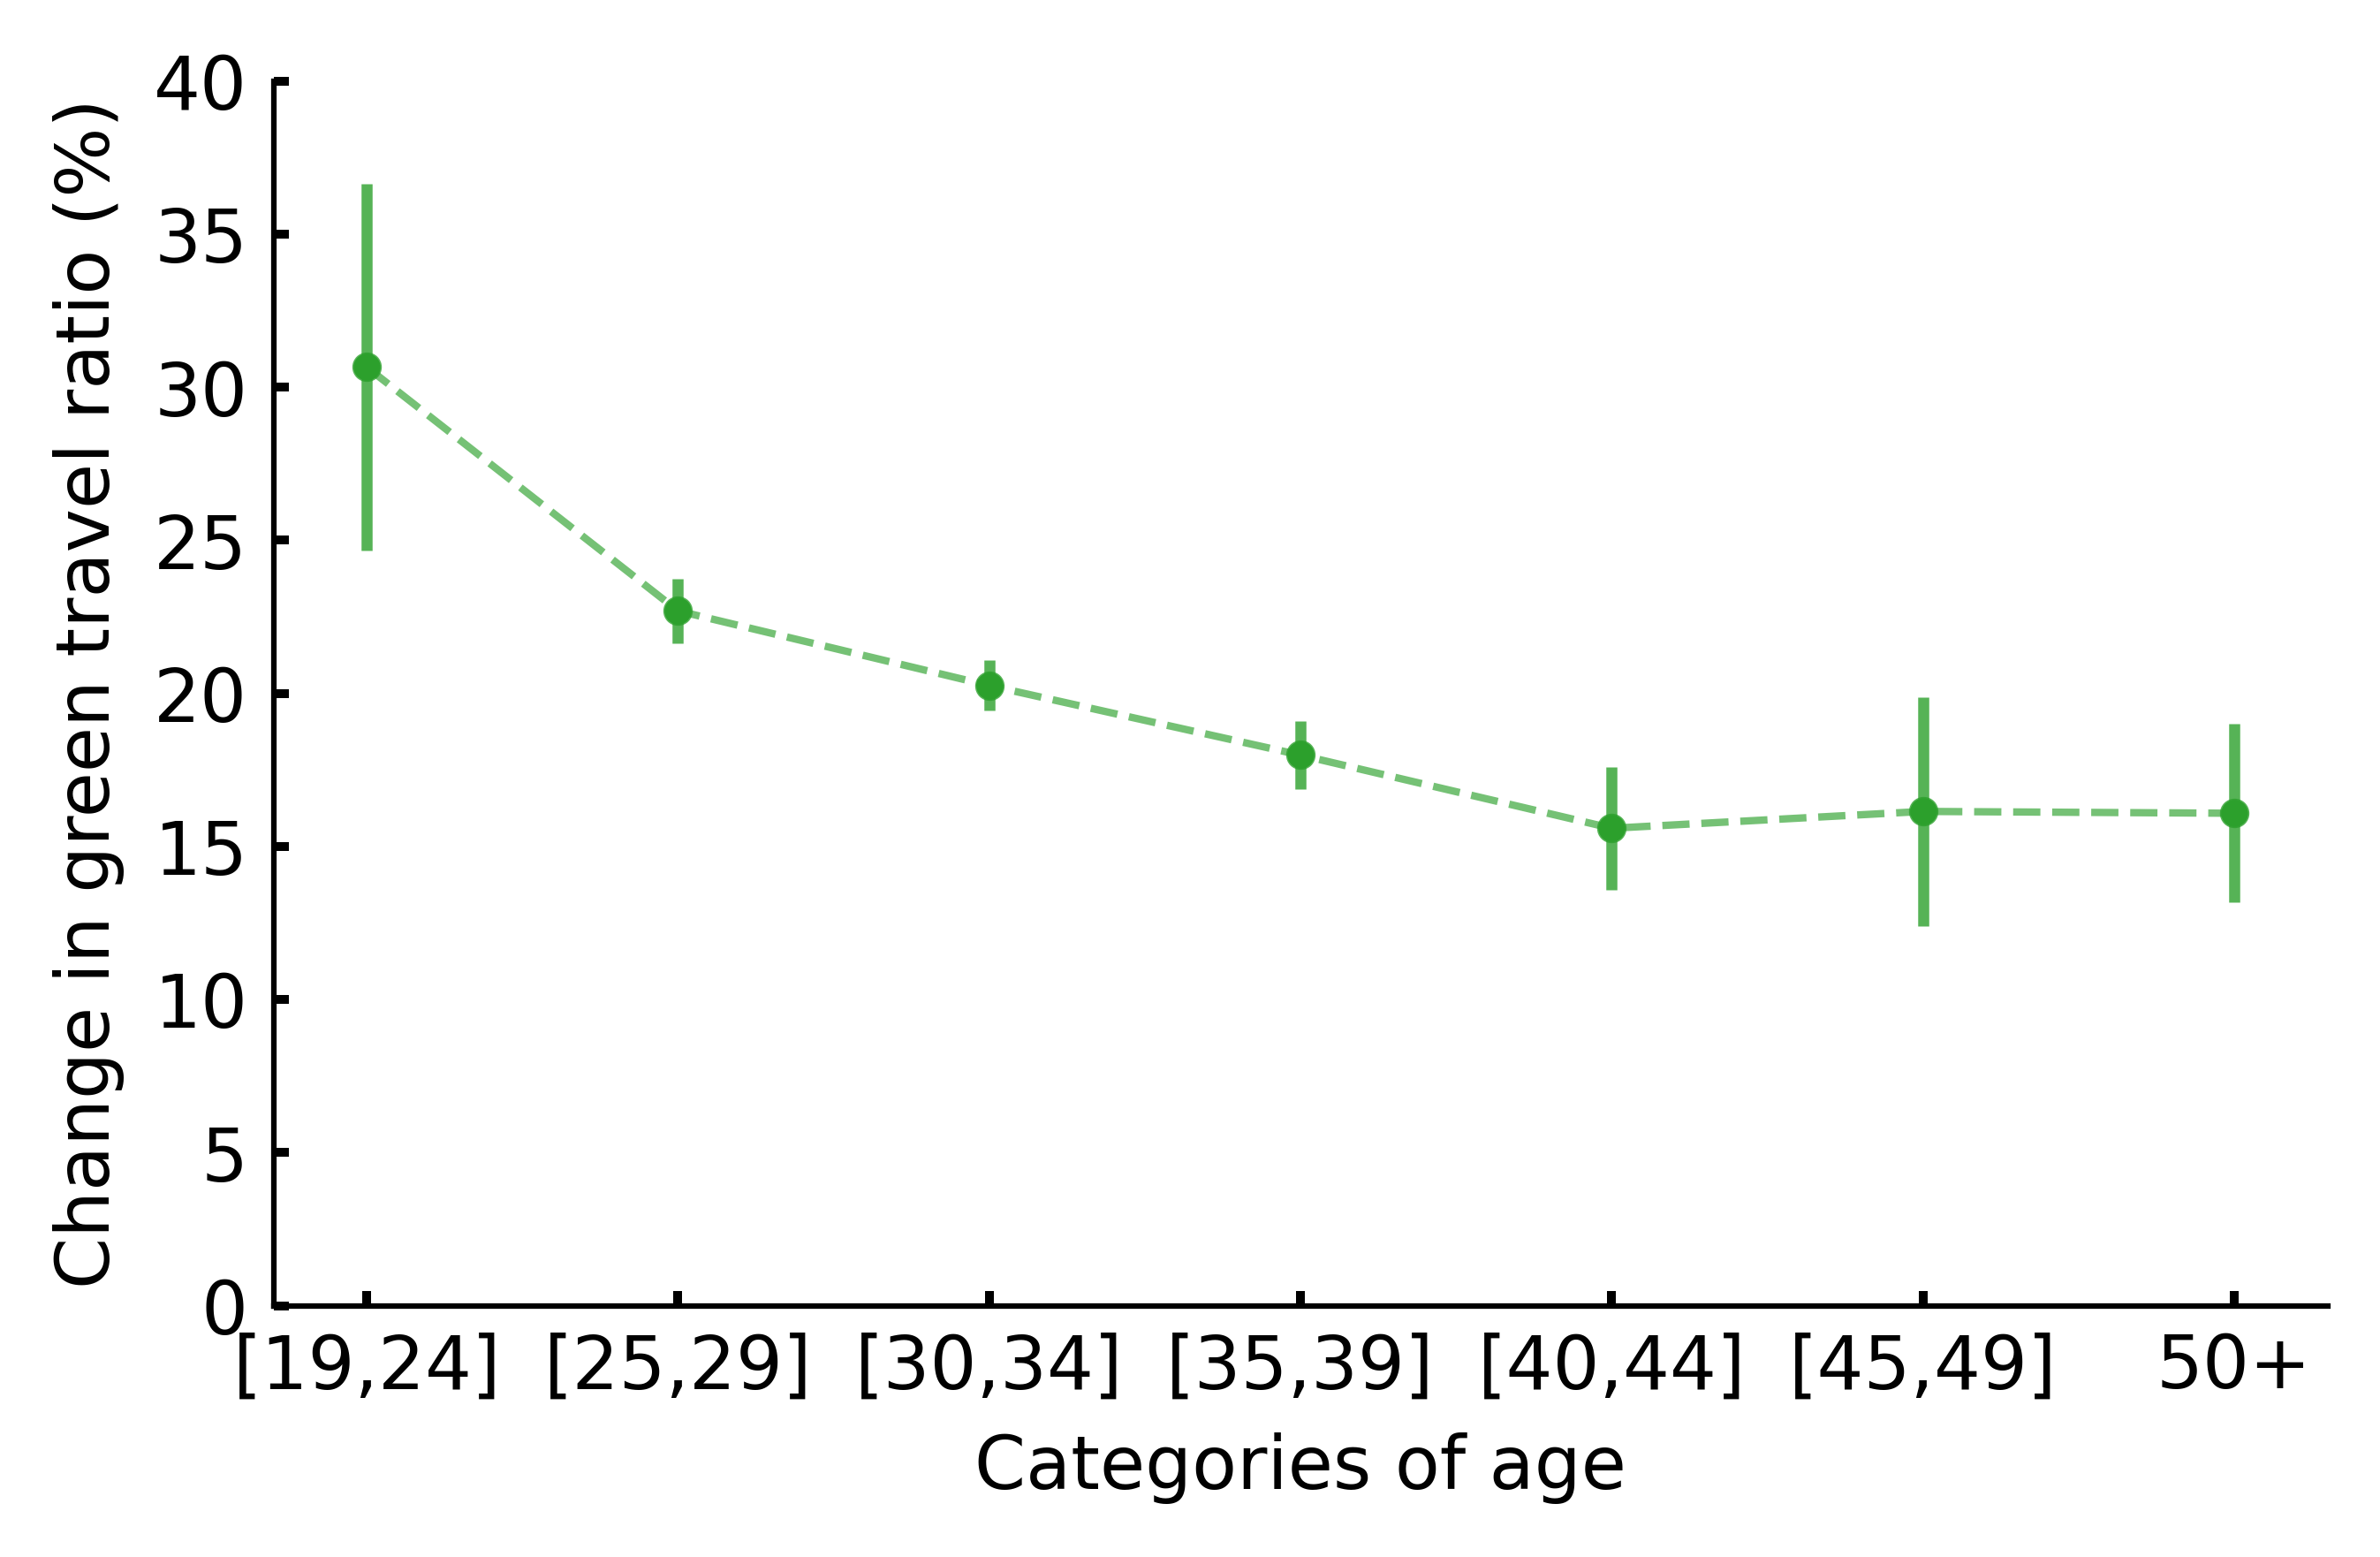

In [38]:
# &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
fig, ax = plt.subplots(figsize=(5,3),dpi=600)


plt.rcdefaults()

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


df=gee

df=df.reset_index(drop=True)

categories = list(df['Age'])
means = list(np.round(np.array(df['Parameter']),2))
upper_bounds = np.array(df['Upper CI'])-np.array(df['Parameter'])
lower_bounds =np.array(df['Parameter'])- np.array(df['Lower CI'])




ax.scatter(categories, means, alpha=1, s=7, color=plt.cm.tab10(2), label='Estimated impacts')
plt.errorbar(categories, means, yerr=[lower_bounds, upper_bounds], fmt='.', 
             ecolor=plt.cm.tab10(2), elinewidth=1.5, capsize=0, label='95% CI',color=plt.cm.tab10(2),alpha=0.8)
#


x = np.arange(len(categories))
ax.plot(x, means, linestyle='--', color=plt.cm.tab10(2),alpha=0.65,lw=1)


erros=upper_bounds-lower_bounds
groups=['[19,24]','[25,29]','[30,34]','[35,39]','[40,44]','[45,49]','50+']
x_positions = range(len(groups))


# Adding labels and title
ax.set_ylabel('Change in green travel ratio (%)',fontsize=10)
ax.set_xlabel("Categories of age",fontsize=10)
ax.tick_params(axis='x', labelsize=10)  
ax.tick_params(axis='y', labelsize=10) 
ax.set_ylim(0,40)
#
ax.tick_params(axis='both',       
            which='major',     
            length=2,         
            width=1.2,           
            color='black',      
            labelsize=10,      
            direction='in')   
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False) 
plt.rcParams['svg.fonttype']='none'

plt.show()

# 5 number of trips per month

In [39]:
gee=pd.read_csv(r'data\panel_d_intervention_effect_for_number_trips.csv')

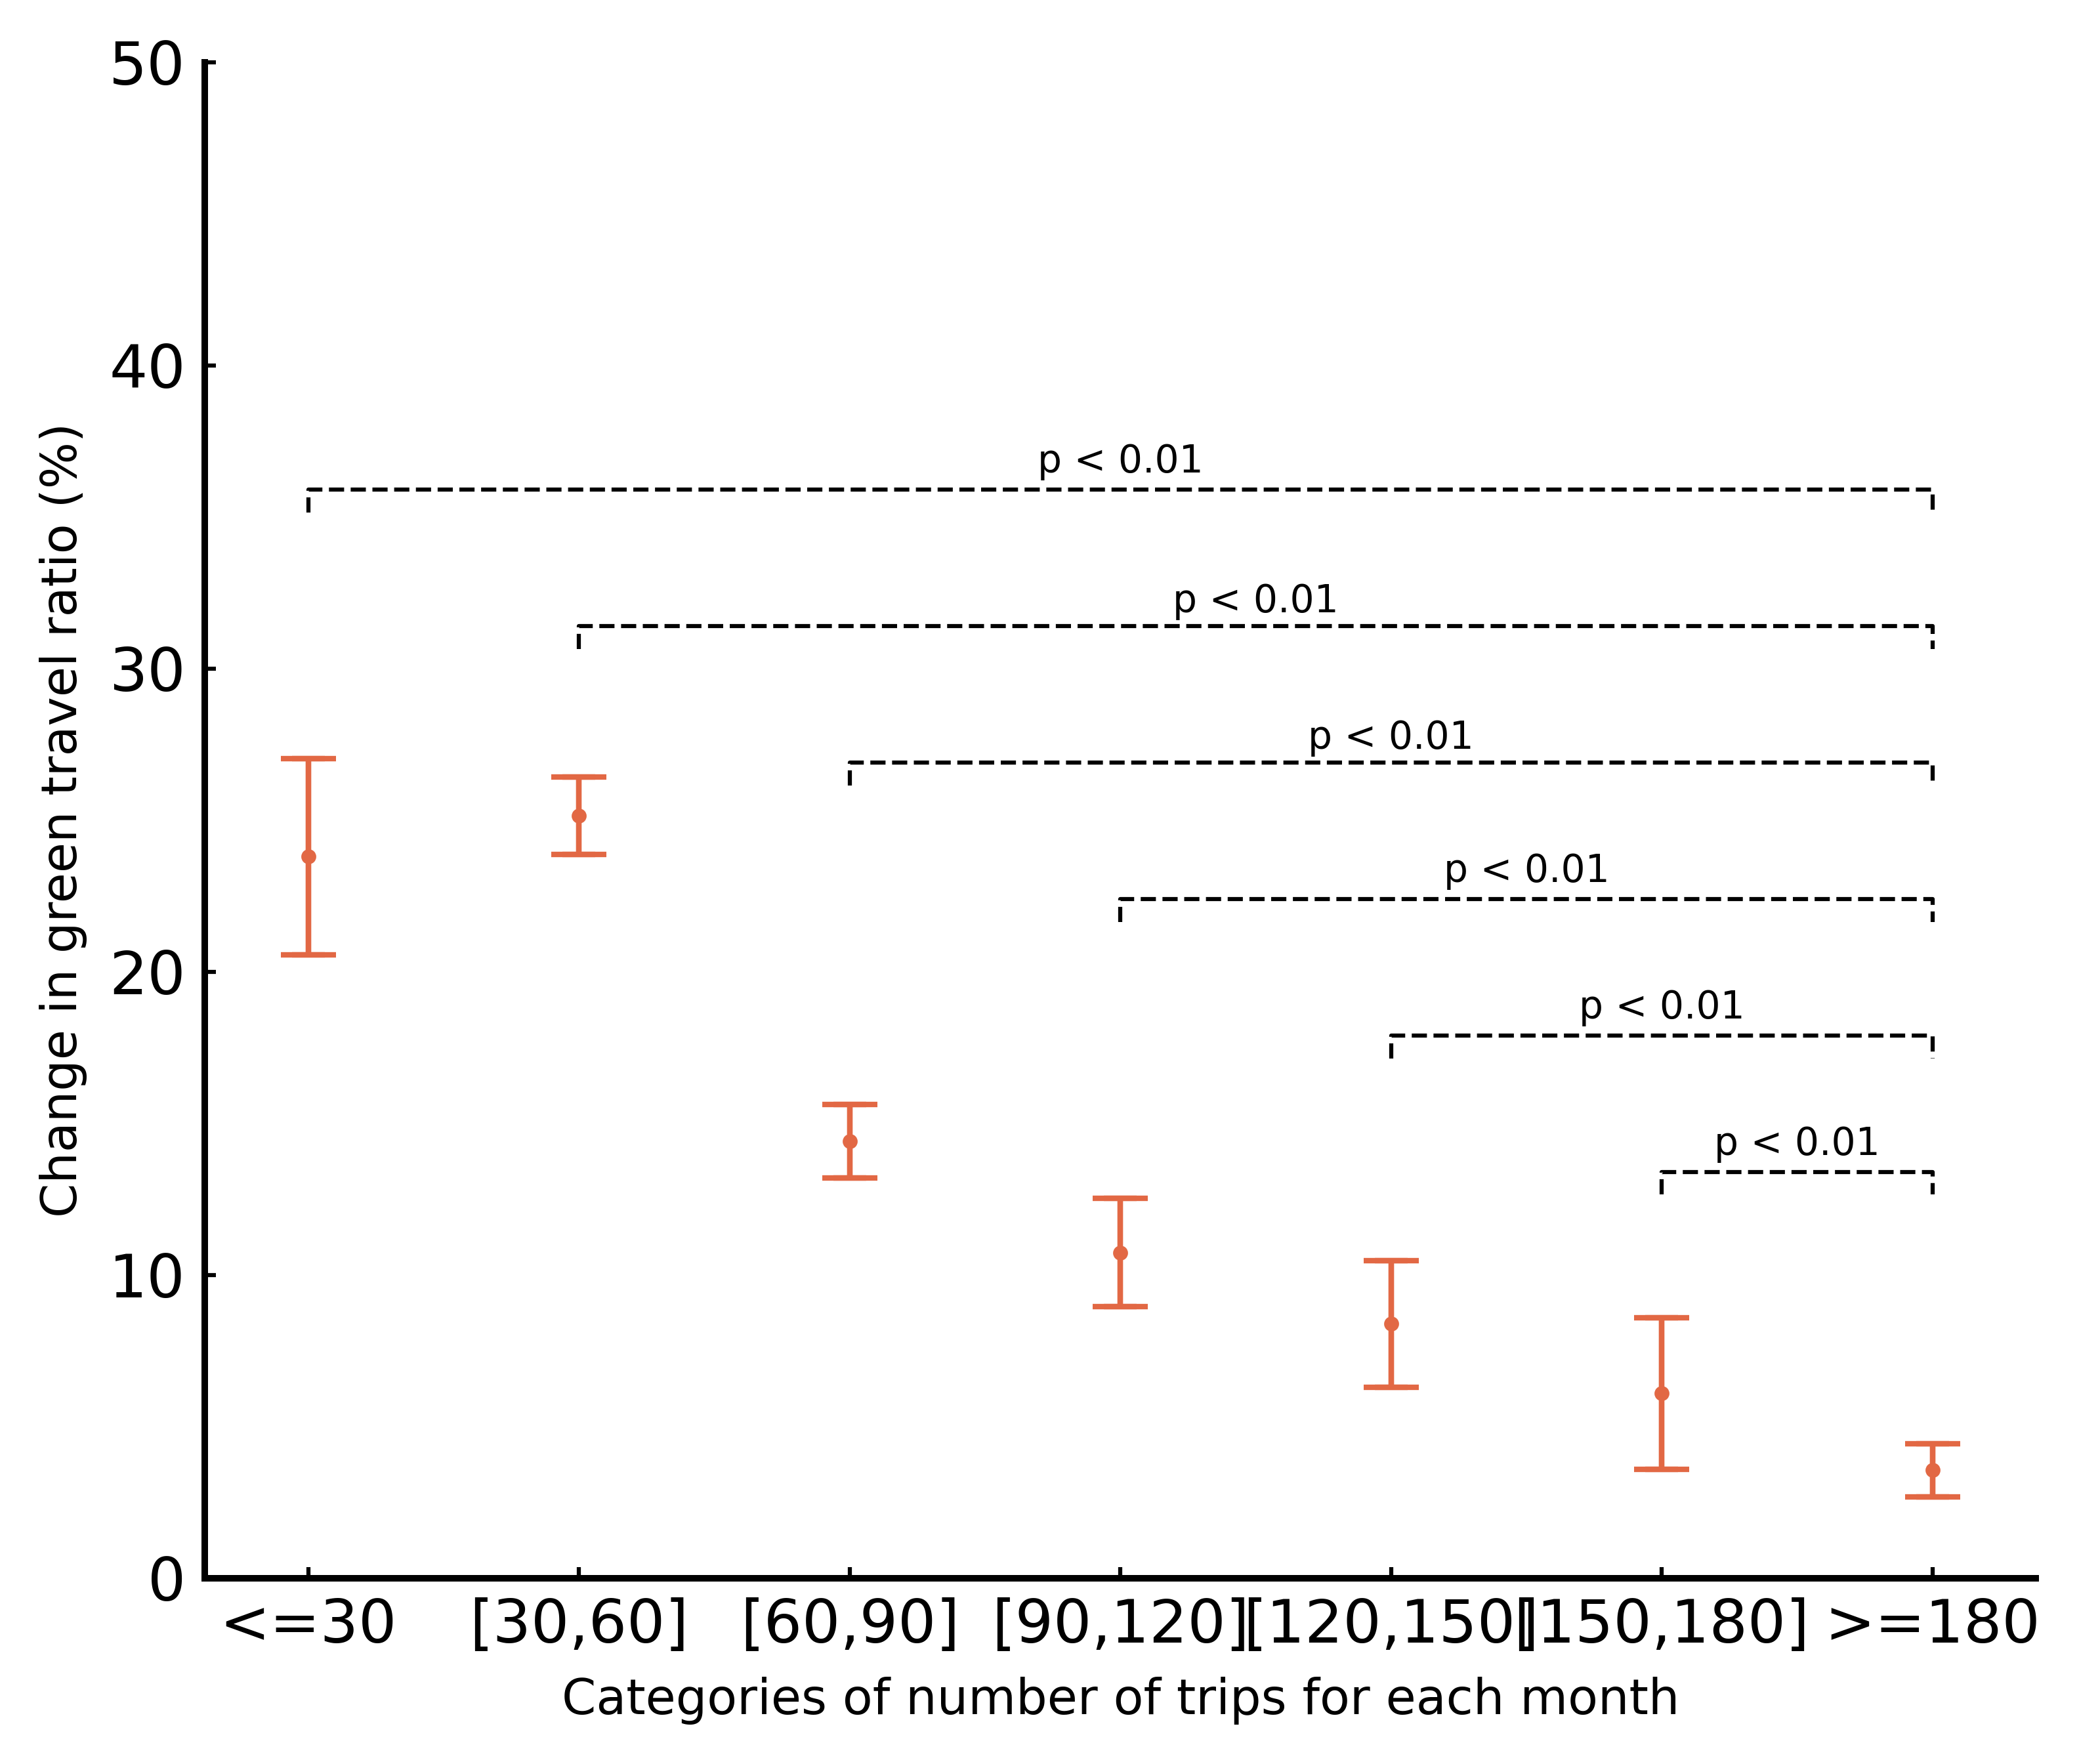

In [40]:
# &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
fig, ax = plt.subplots(figsize=(6,5),dpi=600)


plt.rcdefaults()

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.75
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


df=gee

df=df.reset_index(drop=True)

categories = list(df['Number of trips'])
means = list(np.round(np.array(df['Parameter']),2))
upper_bounds = np.array(df['Upper CI'])-np.array(df['Parameter'])
lower_bounds =np.array(df['Parameter'])- np.array(df['Lower CI'])
ax.scatter(categories, means,alpha=1,s=3,color='#E26844',label='Estimated impacts')
bars = ax.bar(categories, means, yerr=[lower_bounds, upper_bounds], capsize=3,
               error_kw={'elinewidth':1,'alpha':0.95,'ecolor':'#E26844'},
               color='#E26844',width=0.15,alpha=0)

plt.errorbar(categories, means, yerr=[lower_bounds, upper_bounds],fmt='none',
             ecolor='#E26844',elinewidth=1,capsize=5,label='95% CI')
#
erros=upper_bounds-lower_bounds
groups=list(df['Number of trips'])

x_positions = range(len(groups))
y, h, col = max(means) + max(erros) + 10, 0.75, 'black' 
spc=3
ax.plot([x_positions[0], x_positions[0], x_positions[6], x_positions[6]], [y, y + h, y + h, y], lw=0.75, ls='--', c=col)  
ax.text((x_positions[0] + x_positions[6]) * .5, y + h+0.3, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc
ax.plot([x_positions[1], x_positions[1], x_positions[6], x_positions[6]], [yof - 2*h, yof - h, yof - h, yof - 2*h], lw=0.75, ls='--', c=col) 
ax.text((x_positions[1] + x_positions[6]) * .5, yof + h-1.3, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc*2
ax.plot([x_positions[2], x_positions[2], x_positions[6], x_positions[6]], [yof - 4*h, yof - 3*h, yof - 3*h, yof - 4*h], lw=0.75, ls='--', c=col) 
ax.text((x_positions[2] + x_positions[6]) * .5, yof + h-2.8, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc*3
ax.plot([x_positions[3], x_positions[3], x_positions[6], x_positions[6]], [yof - 6*h, yof - 5*h, yof - 5*h, yof - 6*h], lw=0.75, ls='--', c=col) 
ax.text((x_positions[3] + x_positions[6]) * .5, yof + h-4.2, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc*4
ax.plot([x_positions[4], x_positions[4], x_positions[6], x_positions[6]], [yof - 8*h, yof - 7*h, yof - 7*h, yof - 8*h], lw=0.75, ls='--', c=col)  
ax.text((x_positions[4] + x_positions[6]) * .5, yof + h-5.7, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc*5
ax.plot([x_positions[5], x_positions[5], x_positions[6], x_positions[6]], [yof - 10*h, yof - 9*h, yof - 9*h, yof - 10*h], lw=0.75, ls='--', c=col) 
ax.text((x_positions[5] + x_positions[6]) * .5, yof + h-7.2, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

ax.set_ylabel('Change in green travel ratio (%)',fontsize=9)
ax.set_xlabel('Categories of number of trips for each month',fontsize=9)
ax.tick_params(axis='x', labelsize=9) 
ax.tick_params(axis='y', labelsize=9)  
ax.set_ylim(0,50)
#
ax.tick_params(axis='both',    
            which='major',     
            length=2,         
            width=0.75,           
            color='black',       
            labelsize=11,       
            direction='in')  

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 

plt.rcParams['svg.fonttype']='none'




plt.show()

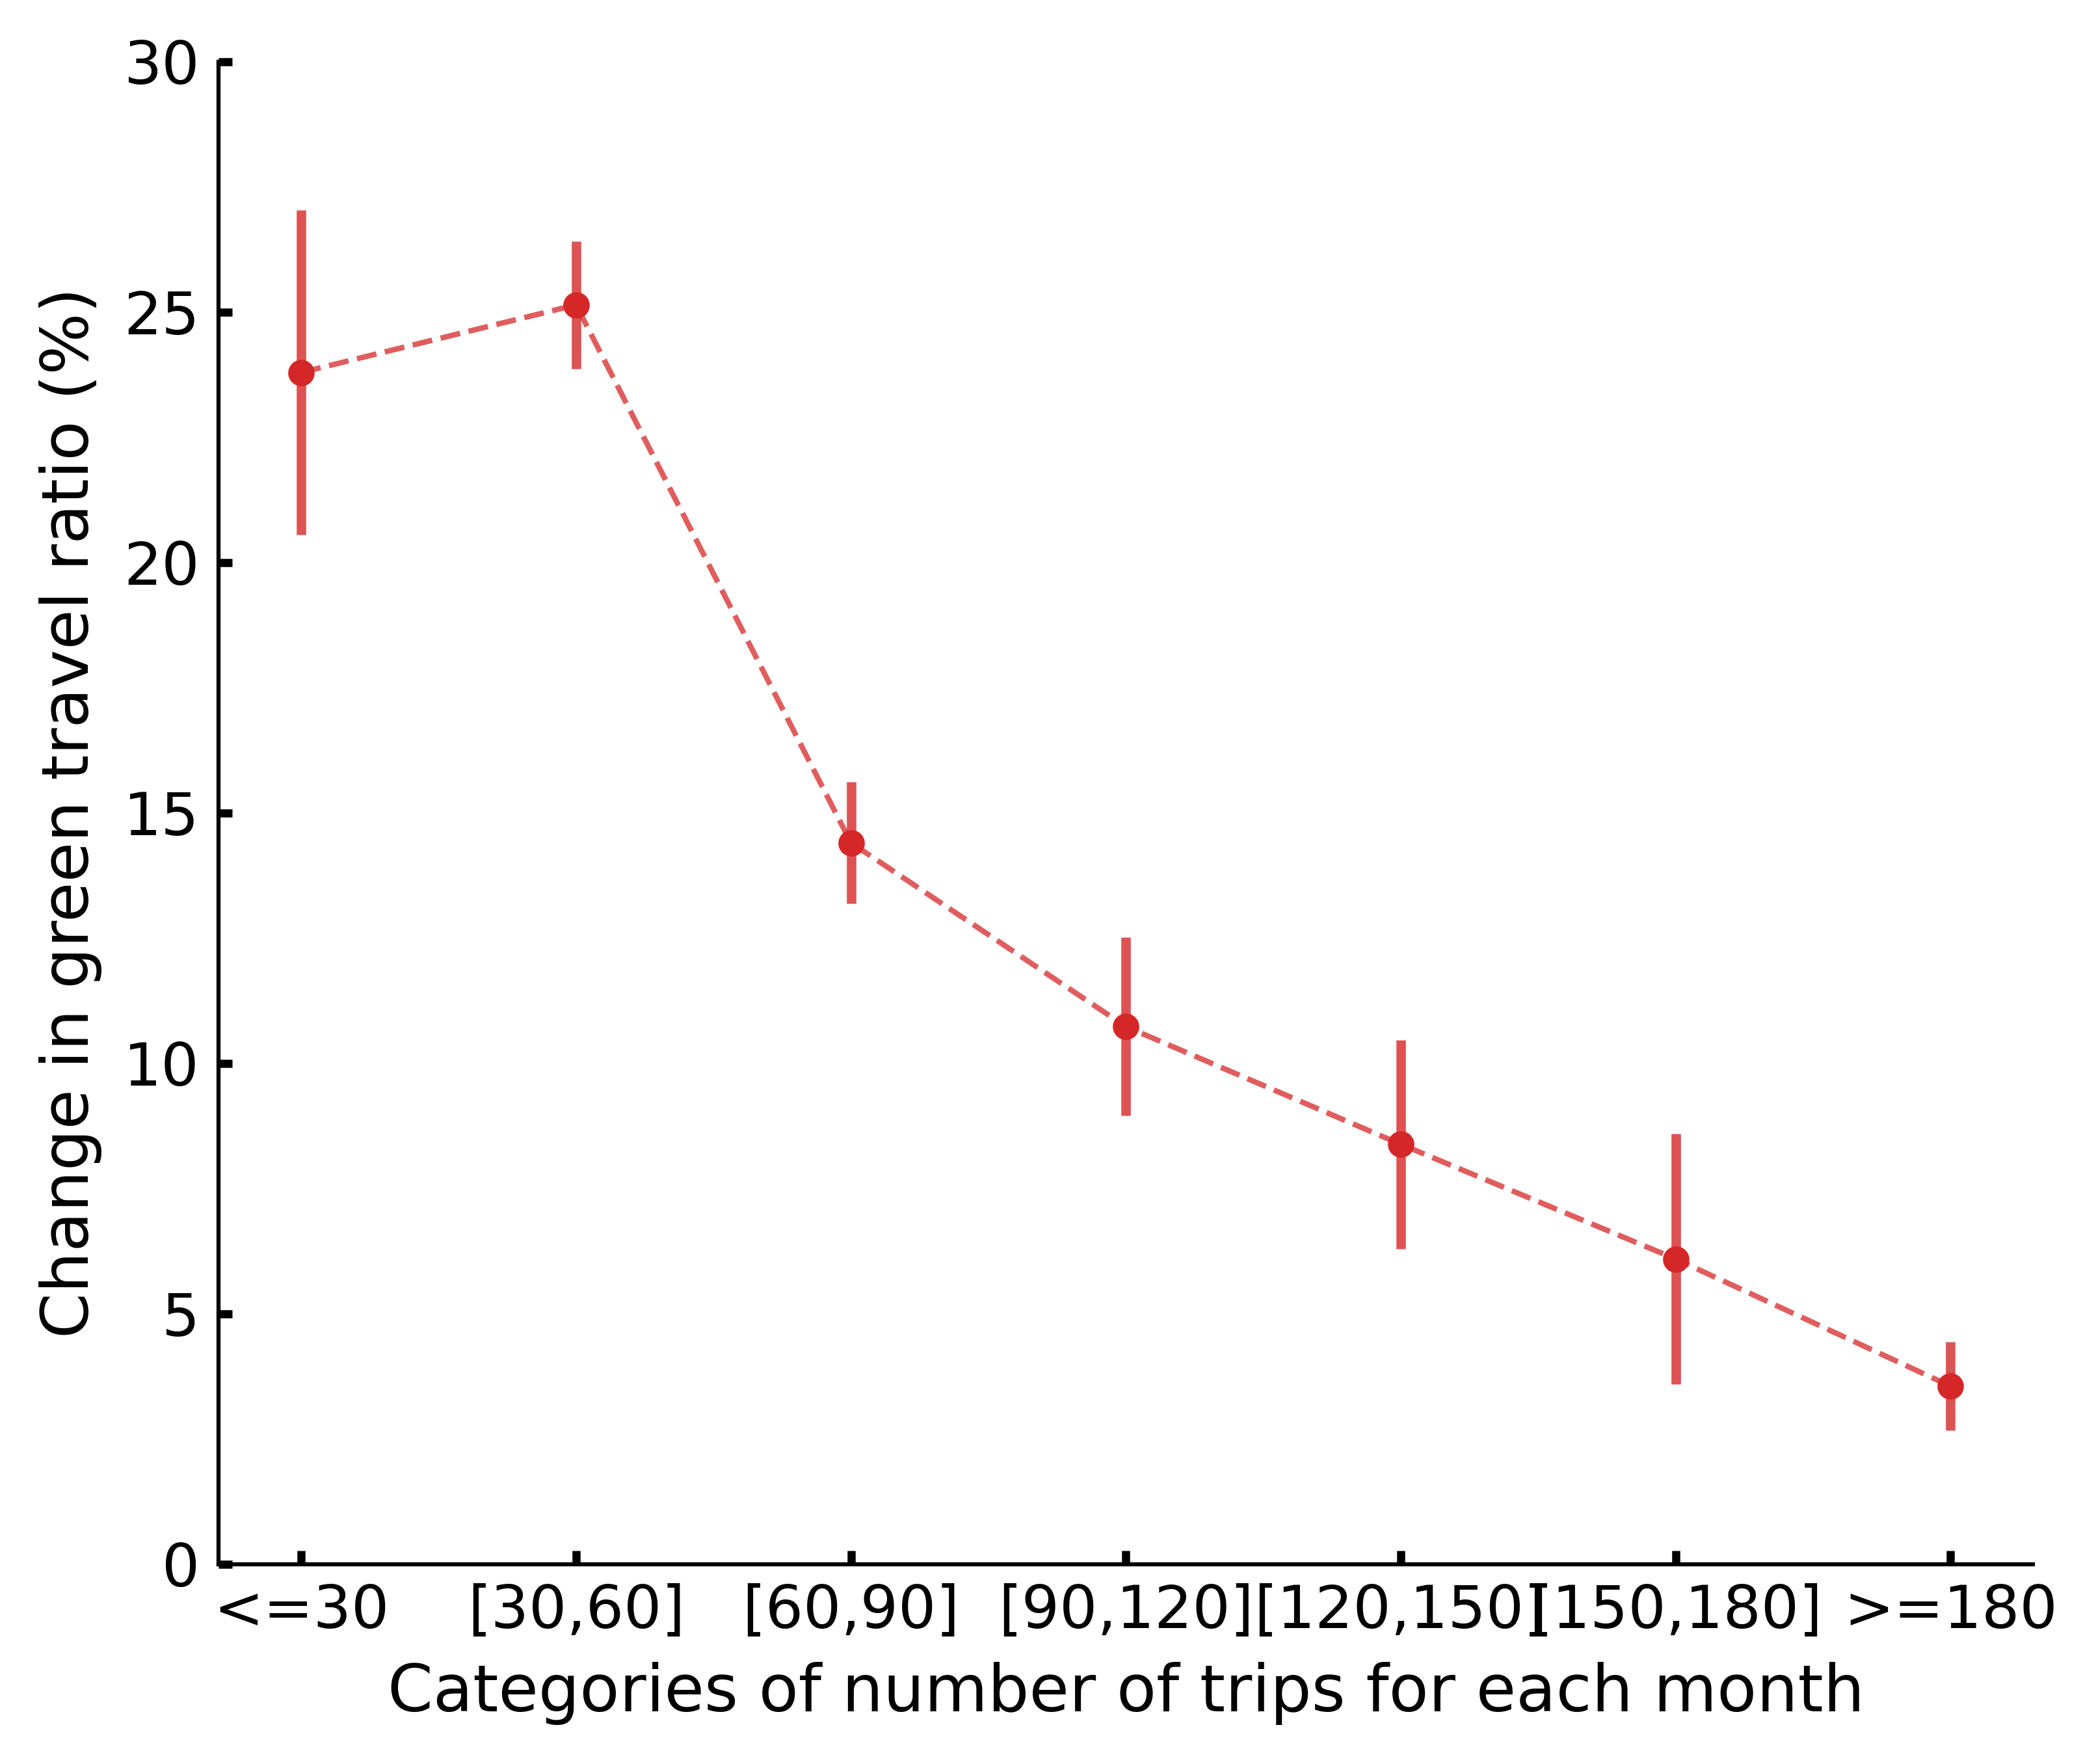

In [41]:
# &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
fig, ax = plt.subplots(figsize=(6,5),dpi=600)


plt.rcdefaults()
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.75
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


df=gee

df=df.reset_index(drop=True)

categories = list(df['Number of trips'])
means = list(np.round(np.array(df['Parameter']),2))
upper_bounds = np.array(df['Upper CI'])-np.array(df['Parameter'])
lower_bounds =np.array(df['Parameter'])- np.array(df['Lower CI'])







ax.scatter(categories, means, alpha=1, s=15, color=plt.cm.tab10(3), label='Estimated impacts')
plt.errorbar(categories, means, yerr=[lower_bounds, upper_bounds], fmt='.', 
             ecolor=plt.cm.tab10(3), elinewidth=1.75, capsize=0, label='95% CI',color=plt.cm.tab10(3),alpha=0.8)

#
x = np.arange(len(categories))
ax.plot(x, means, linestyle='--', color=plt.cm.tab10(3),alpha=0.75,lw=1)



# Adding labels and title
ax.set_ylabel('Change in green travel ratio (%)',fontsize=12)
ax.set_xlabel('Categories of number of trips for each month',fontsize=12)
ax.tick_params(axis='x', labelsize=10) 
ax.tick_params(axis='y', labelsize=10)  
ax.set_ylim(0,30)
#
ax.tick_params(axis='both',       
            which='major',   
            length=2.5,         
            width=1.5,          
            color='black',         
            labelsize=11,        
            direction='in')    
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False) 
plt.rcParams['svg.fonttype']='none'


# 6 Average_travel_time per month

In [42]:
gee=pd.read_csv(r'data\panel_d_intervention_effect_for_trip_time.csv')

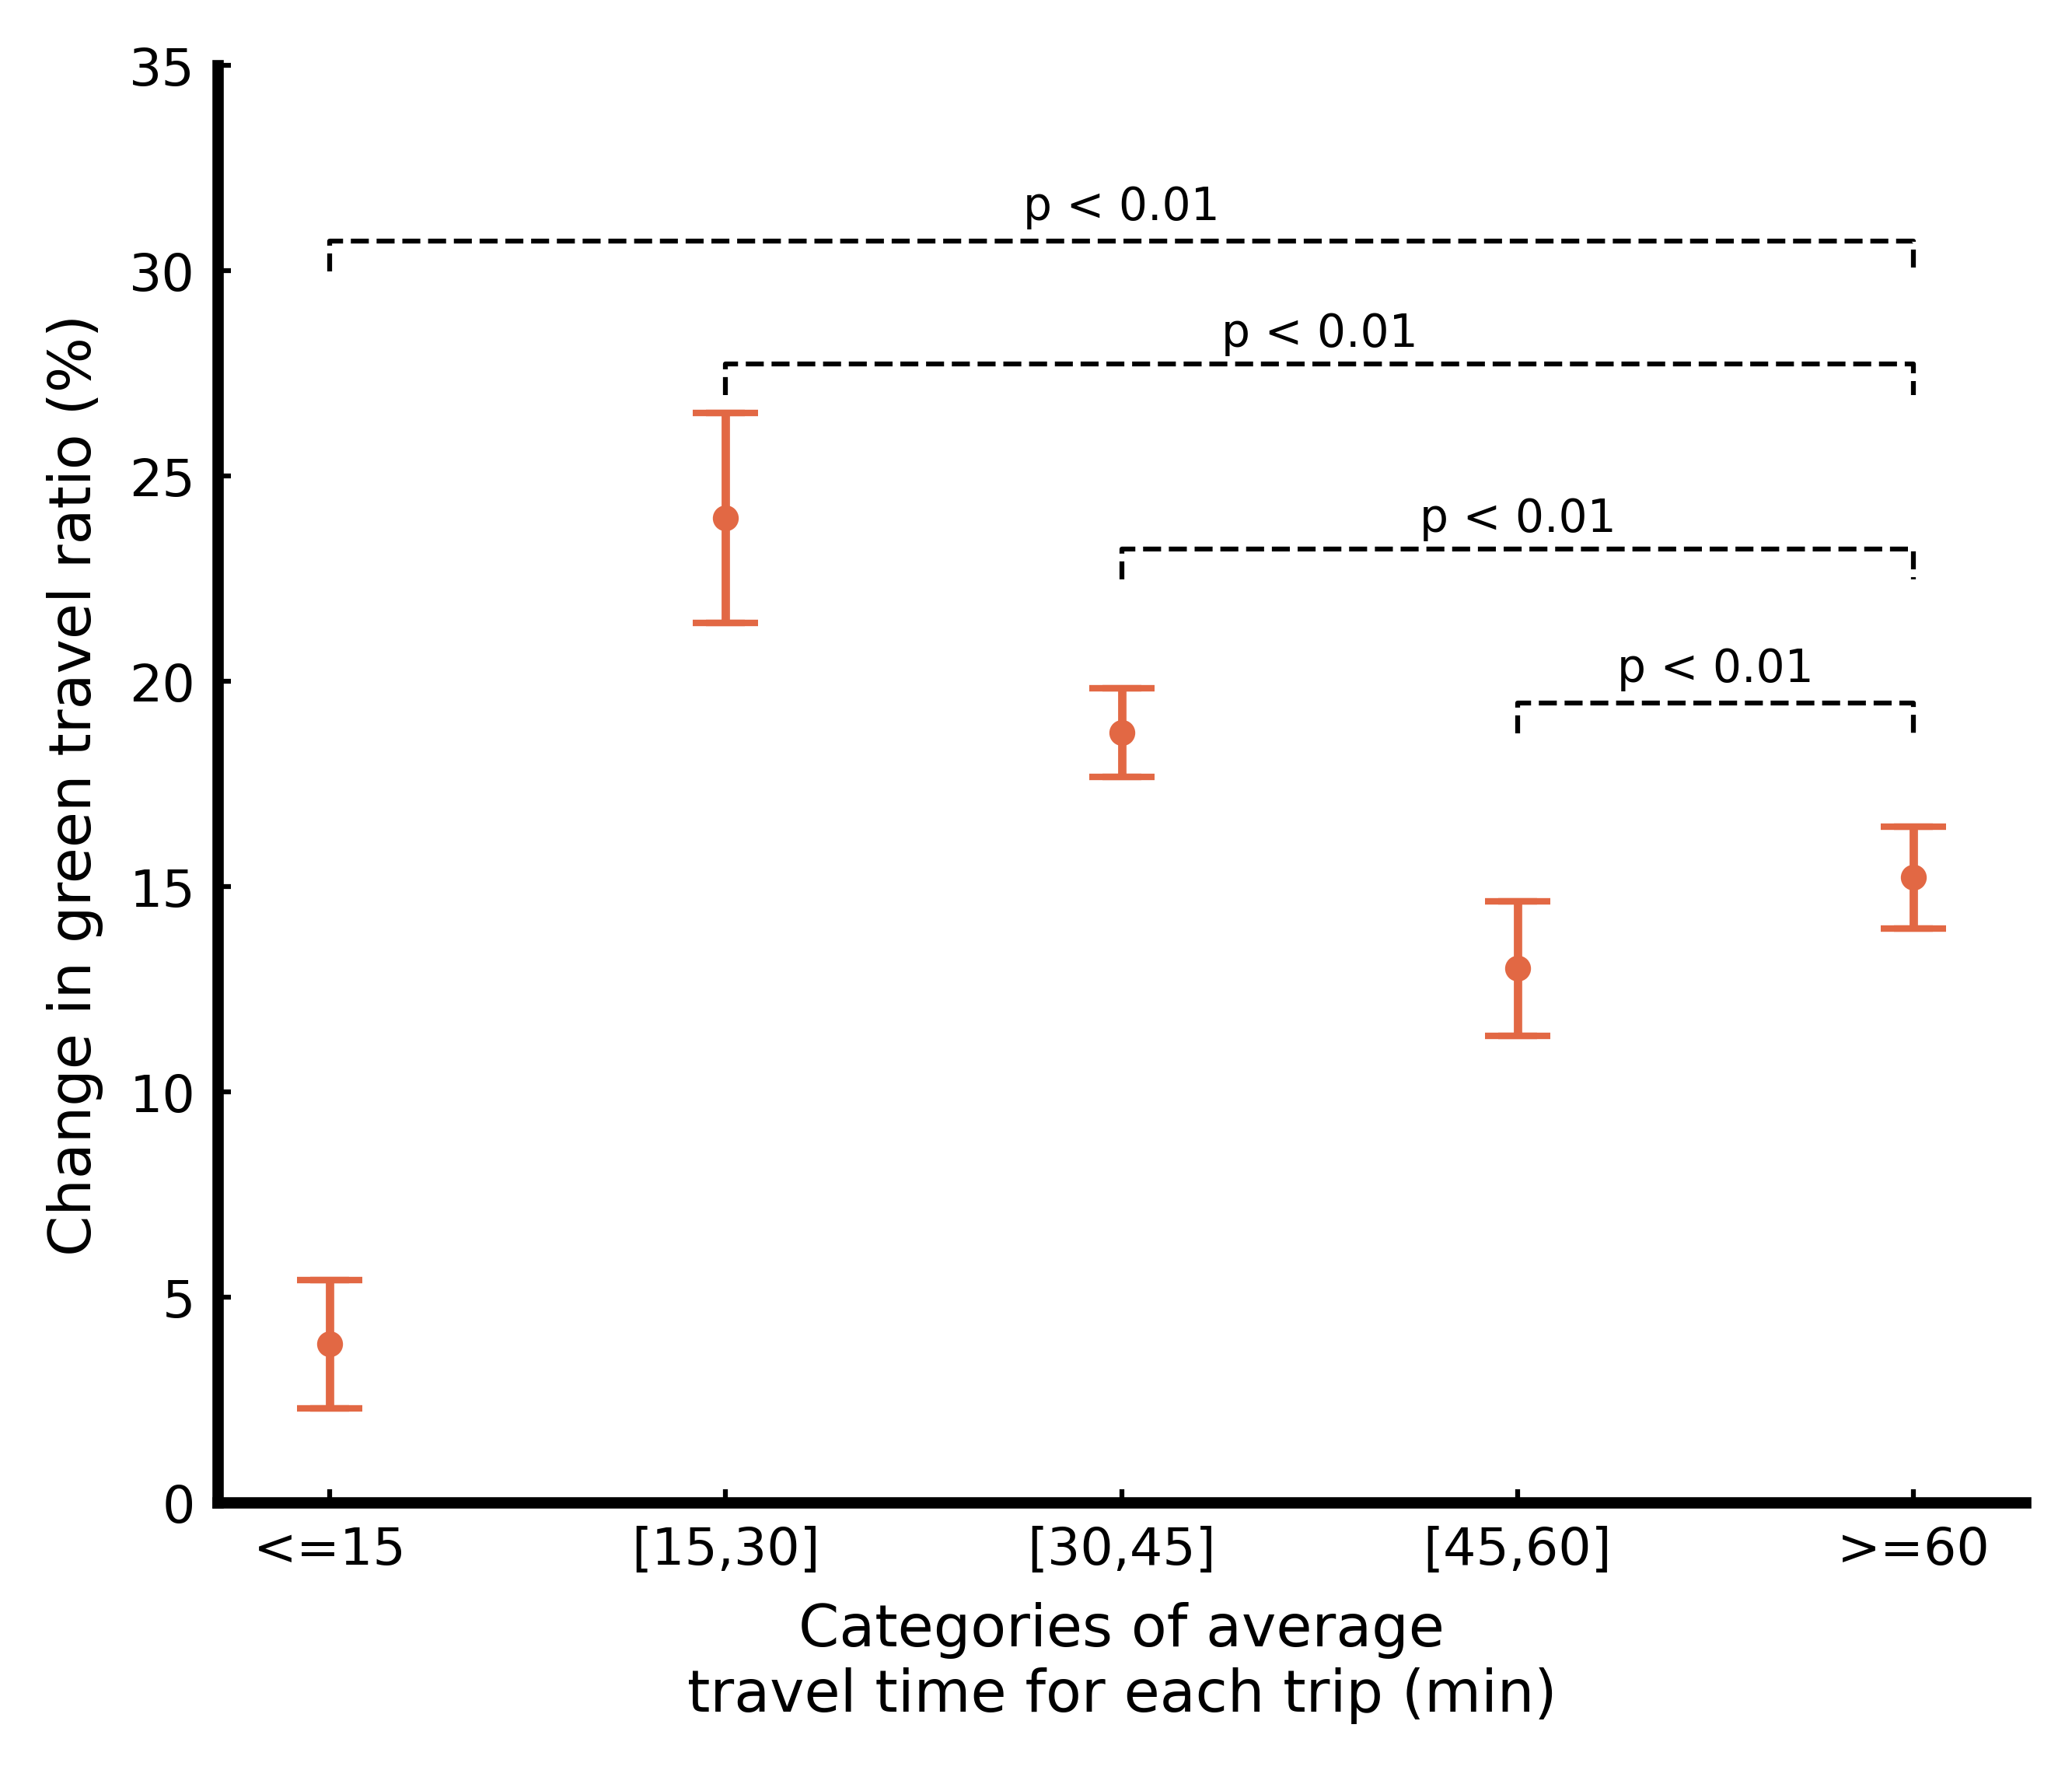

In [43]:
# &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
fig, ax = plt.subplots(figsize=(5,4),dpi=600)


plt.rcdefaults()

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.75
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


df=gee

df=df.reset_index(drop=True)


categories = list(df['Average travel time (min)'])
means = list(np.round(np.array(df['Parameter']),2))
upper_bounds = np.array(df['Upper CI'])-np.array(df['Parameter'])
lower_bounds =np.array(df['Parameter'])- np.array(df['Lower CI'])
ax.scatter(categories, means,alpha=1,s=9,color='#E26844',label='Estimated impacts')
bars = ax.bar(categories, means, yerr=[lower_bounds, upper_bounds], capsize=3,
               error_kw={'elinewidth':1.3,'alpha':0.95,'ecolor':'#E26844'},
               color='#E26844',width=0.15,alpha=0)

plt.errorbar(categories, means, yerr=[lower_bounds, upper_bounds],fmt='none',
             ecolor='#E26844',elinewidth=1,capsize=5,label='95% CI')
#
erros=upper_bounds-lower_bounds
groups=list(df['Average travel time (min)'])

x_positions = range(len(groups))
y, h, col = max(means) + max(erros) + 6, 0.75, 'black'  
spc=1.5
ax.plot([x_positions[0], x_positions[0], x_positions[4], x_positions[4]], [y, y + h, y + h, y], lw=0.75, ls='--', c=col)  
ax.text((x_positions[0] + x_positions[4]) * .5, y + h+0.3, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc
ax.plot([x_positions[1], x_positions[1], x_positions[4], x_positions[4]], [yof - 2*h, yof - h, yof - h, yof - 2*h], lw=0.75, ls='--', c=col)  
ax.text((x_positions[1] + x_positions[4]) * .5, yof + h-1.3, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc*3
ax.plot([x_positions[2], x_positions[2], x_positions[4], x_positions[4]], [yof - 4*h, yof - 3*h, yof - 3*h, yof - 4*h], lw=0.75, ls='--', c=col)  
ax.text((x_positions[2] + x_positions[4]) * .5, yof + h-2.8, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)

yof=y-spc*4.5
ax.plot([x_positions[3], x_positions[3], x_positions[4], x_positions[4]], [yof - 6*h, yof - 5*h, yof - 5*h, yof - 6*h], lw=0.75, ls='--', c=col) 
ax.text((x_positions[3] + x_positions[4]) * .5, yof + h-4.2, 'p < 0.01', ha='center', va='bottom', color=col,fontsize=7)


ax.set_ylabel('Change in green travel ratio (%)',fontsize=9)
ax.set_xlabel('Categories of average\ntravel time for each trip (min)',fontsize=9)
ax.tick_params(axis='x', labelsize=9) 
ax.tick_params(axis='y', labelsize=9) 
ax.set_ylim(0,35)
#
ax.tick_params(axis='both',        
            which='major',       
            length=2,             
            width=0.75,         
            color='black',        
            labelsize=8,        
            direction='in')    
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)  
plt.show()

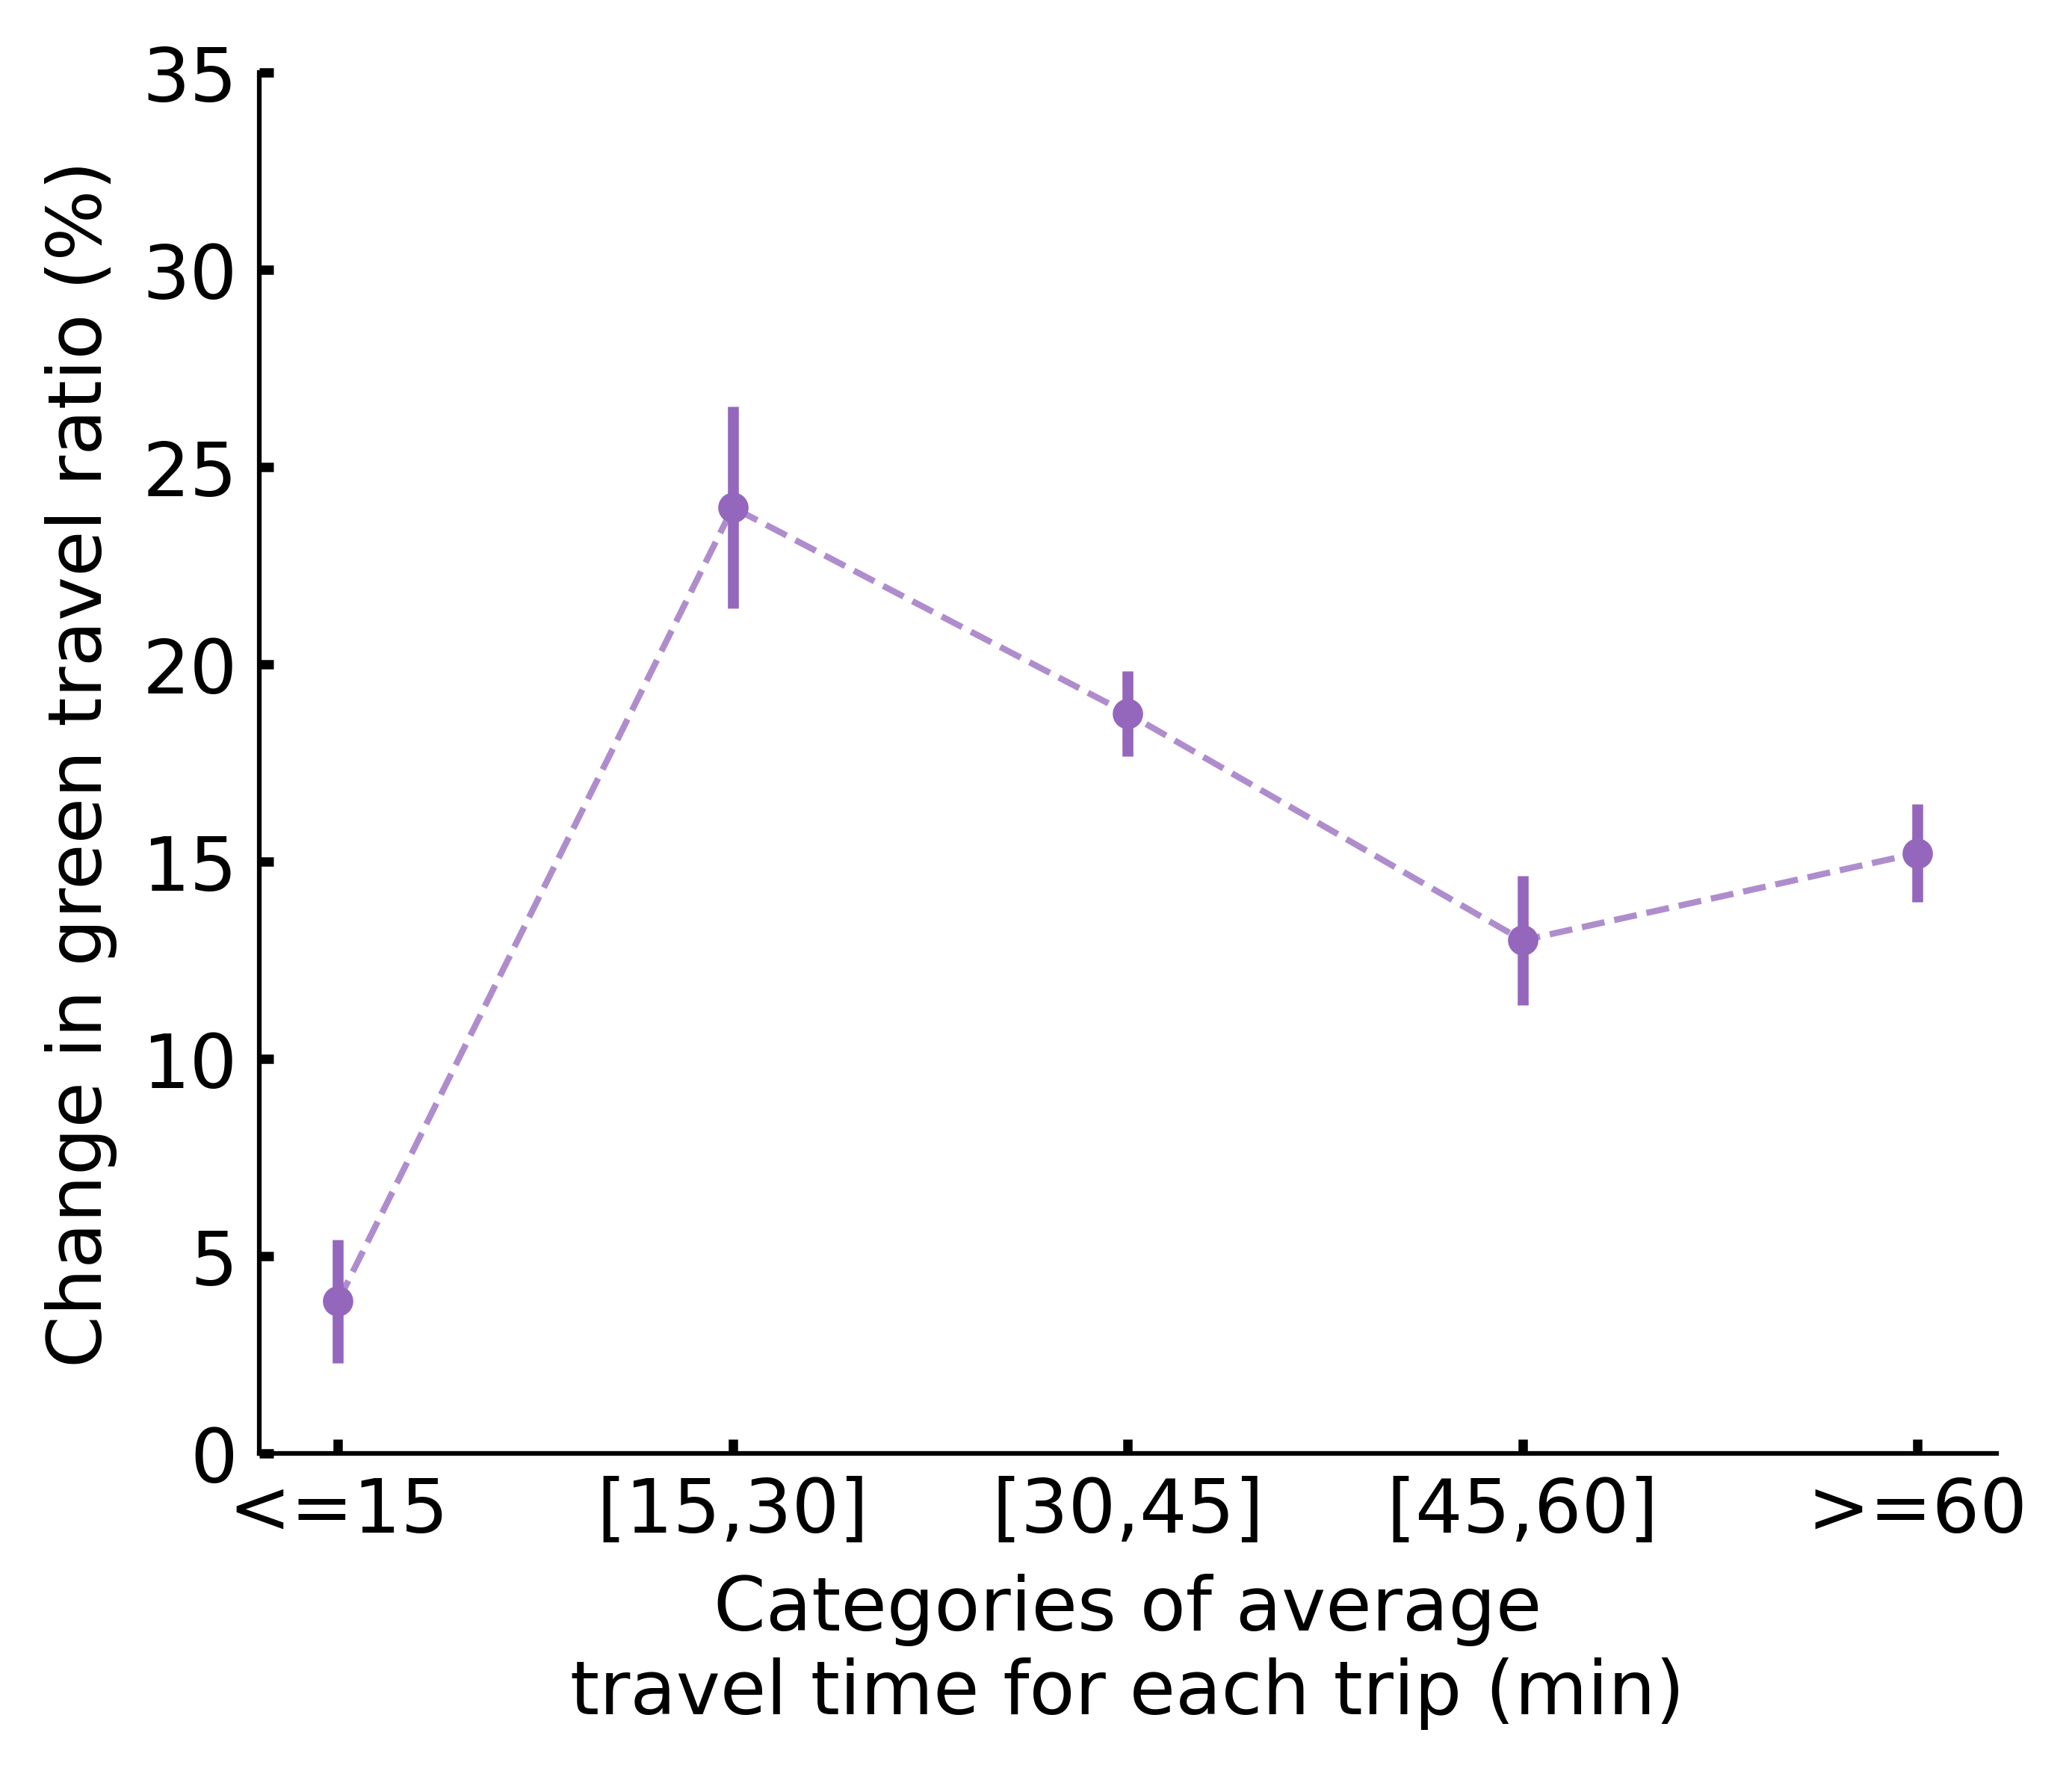

In [44]:
# &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
fig, ax = plt.subplots(figsize=(5,4),dpi=600)


plt.rcdefaults()

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


df=gee

df=df.reset_index(drop=True)


categories = list(df['Average travel time (min)'])
means = list(np.round(np.array(df['Parameter']),2))
upper_bounds = np.array(df['Upper CI'])-np.array(df['Parameter'])
lower_bounds =np.array(df['Parameter'])- np.array(df['Lower CI'])



ax.scatter(categories, means, alpha=1, s=15, color=plt.cm.tab10(4), label='Estimated impacts')
plt.errorbar(categories, means, yerr=[lower_bounds, upper_bounds], fmt='.', 
             ecolor=plt.cm.tab10(4), elinewidth=1.75, capsize=0, label='95% CI',color=plt.cm.tab10(4))
#

x = np.arange(len(categories))
ax.plot(x, means, linestyle='--', color=plt.cm.tab10(4),alpha=0.75,lw=1)

# Adding labels and title
ax.set_ylabel('Change in green travel ratio (%)',fontsize=12)
ax.set_xlabel('Categories of average\ntravel time for each trip (min)',fontsize=12)
ax.tick_params(axis='x', labelsize=12)  #
ax.tick_params(axis='y', labelsize=12)  
ax.set_ylim(0,35)
#
ax.tick_params(axis='both',         
            which='major',       
            length=2.3,            
            width=1.5,            
            color='black',         
            labelsize=12,         
            direction='in')   
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 

# 7 influence of incentive on trip_time

In [45]:
df=pd.read_csv(r'data\panel_e_intervention_influence_on_trip_time.csv')

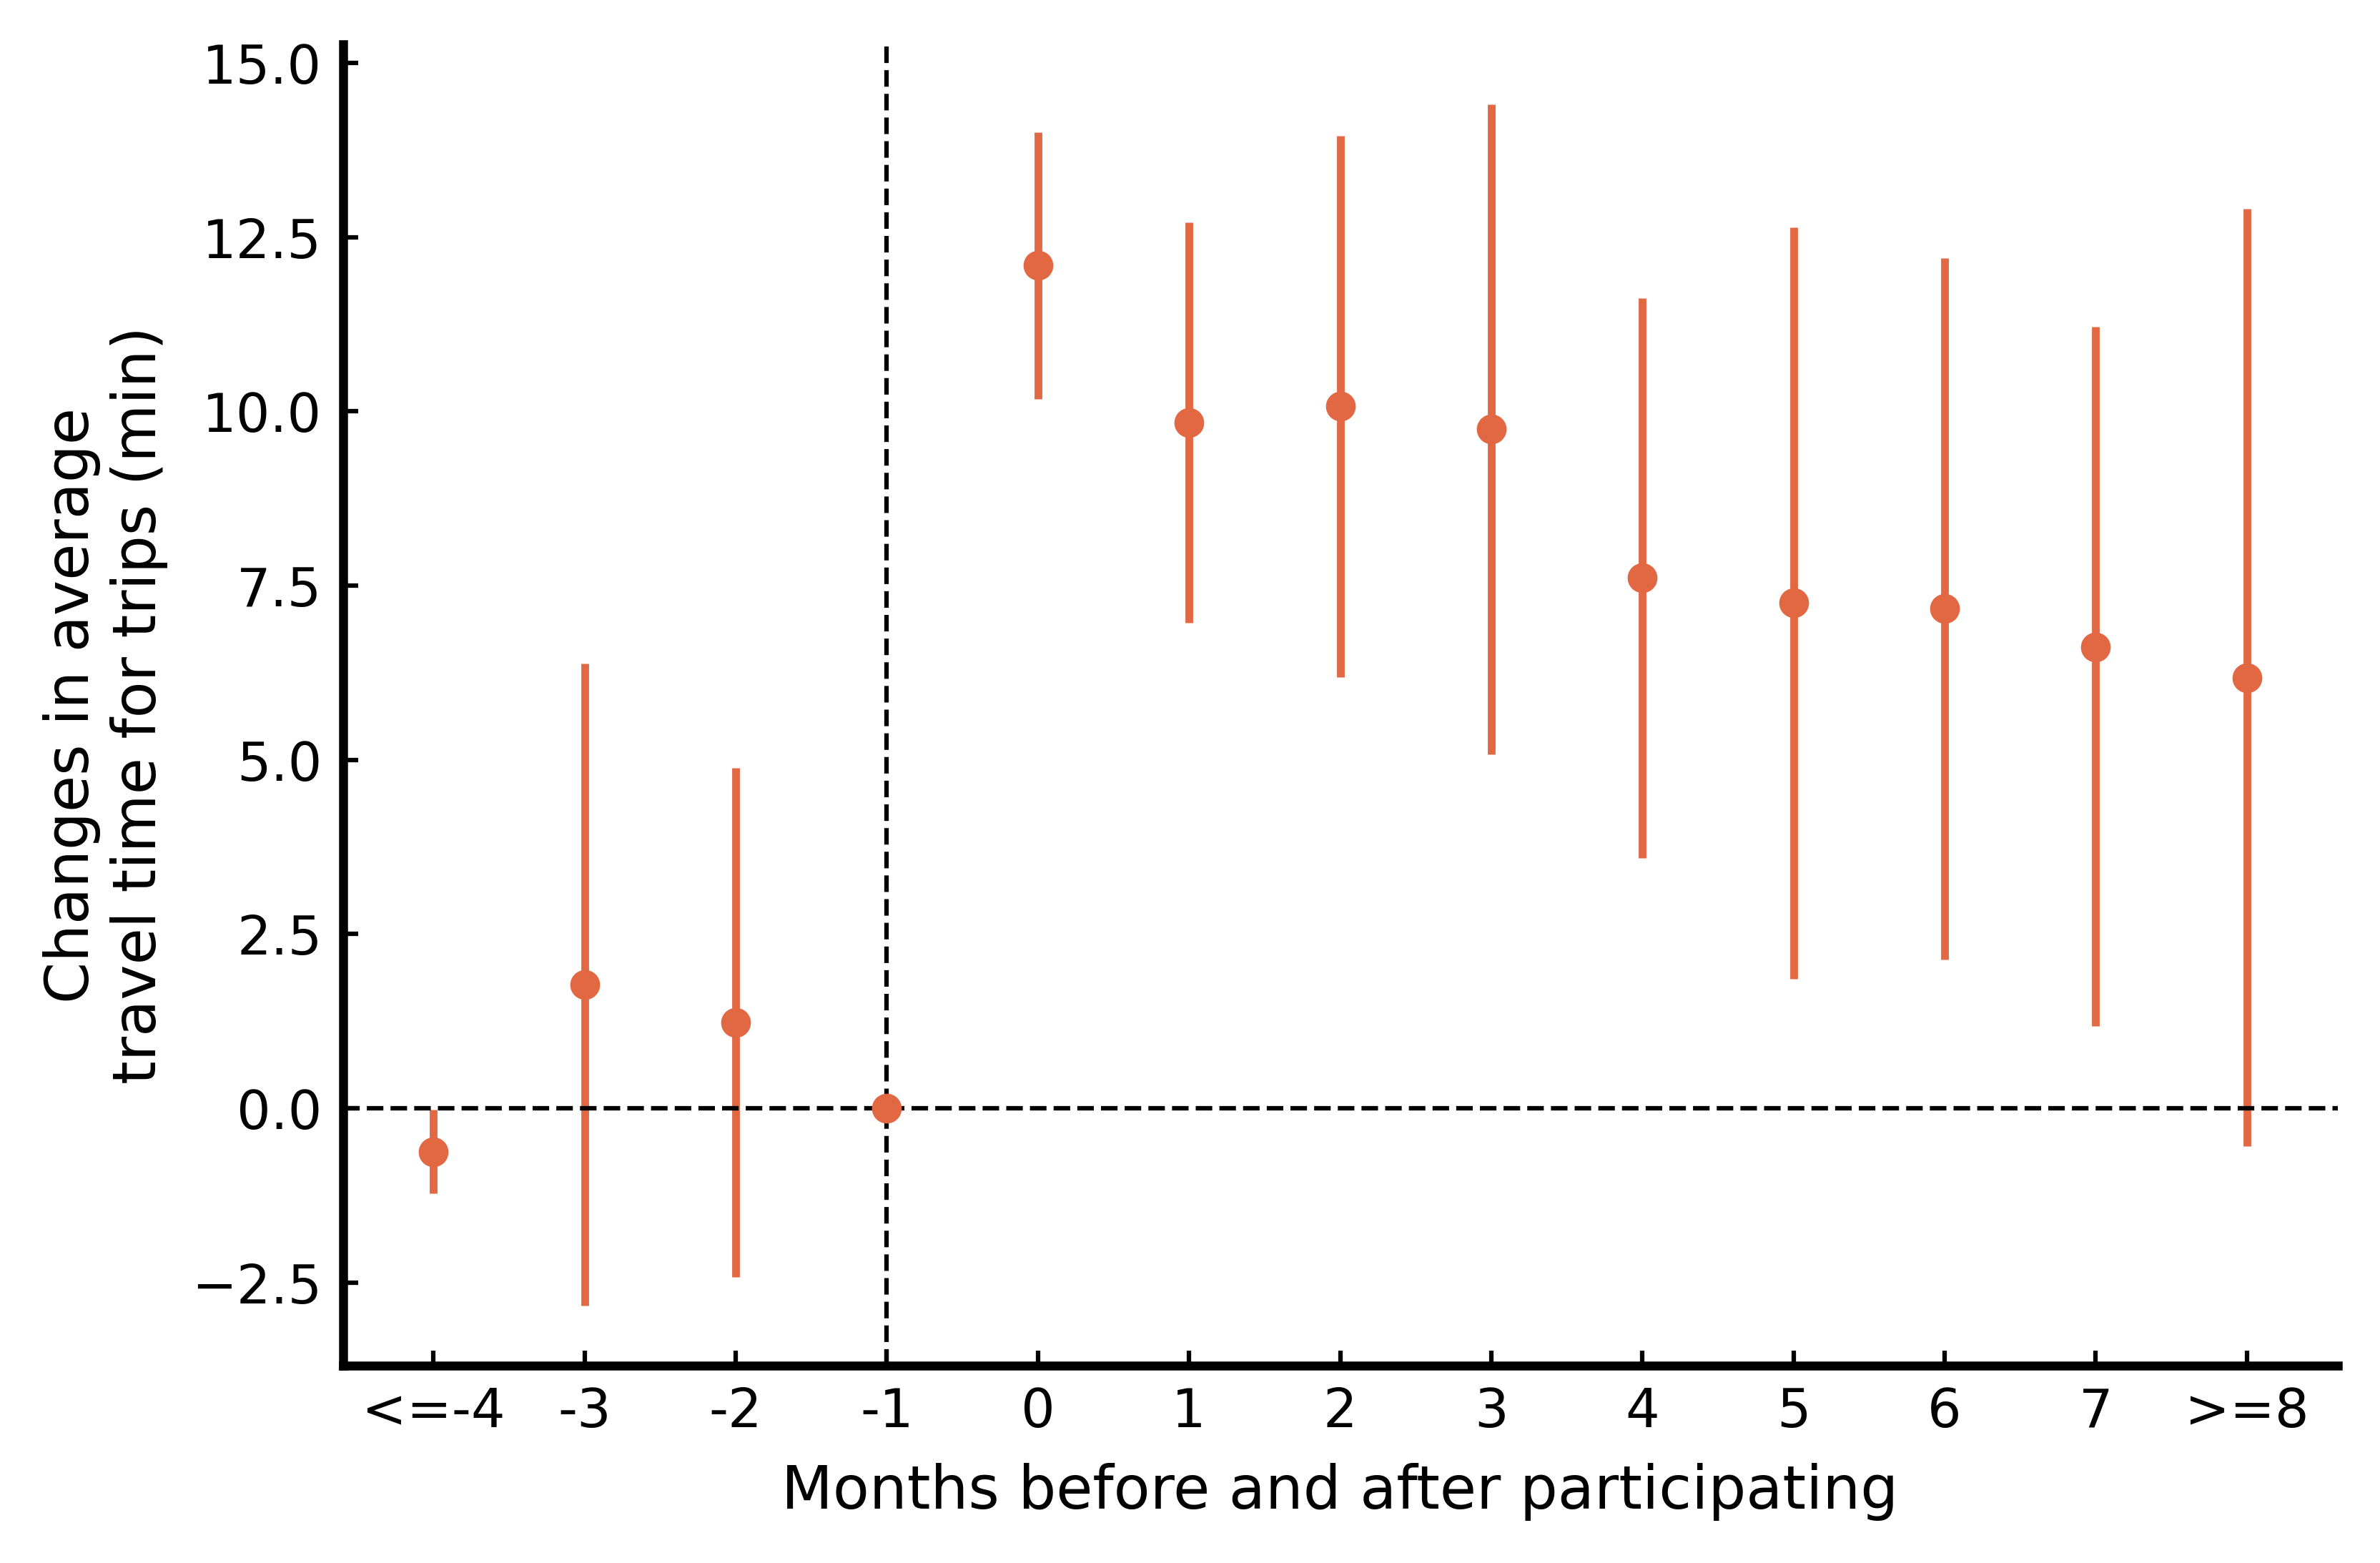

In [46]:

fig, ax = plt.subplots(figsize=(6,4),dpi=600)
plt.rcdefaults()

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.75
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


ax.errorbar(df['vars'], df['Parameter'], 
            yerr=[np.array(df['Parameter']) - np.array(df['Lower CI']), 
                  np.array(df['Upper CI']) - np.array(df['Parameter'])], 
            fmt='.', color='#E26844', ecolor='#E26844', capsize=0, capthick=1.3, label='Estimated Impacts',markersize=8,linewidth=1.3)


ax.axhline(y=0, color='black', linestyle='--', linewidth=.75)
ax.axvline(x=3, color='black', linestyle='--', linewidth=.75)

ax.set_xlabel('Months before and after participating',fontsize=10)
#
ax.set_xticks([0,1, 2, 3, 4, 5,6,7,8,9,10,11,12]) 
ax.set_xticklabels(['<=-4', '-3', '-2', '-1', '0','1','2','3','4','5','6','7','>=8'],fontsize=10)
# ax.set_ylim(-3,30)

ax.set_ylabel('Changes in average\ntravel time for trips (min)',fontsize=10)
#
ax.tick_params(axis='both',        
            which='major',      
            length=2.5,          
            width=0.75,           
            color='black',         
            labelsize=9,         
            direction='in')    
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)  
plt.rcParams['svg.fonttype']='none'




# 8 Influence on app usage

In [47]:
df=pd.read_csv(r'data\panel_e_intervention_influence_on_app_usage.csv')

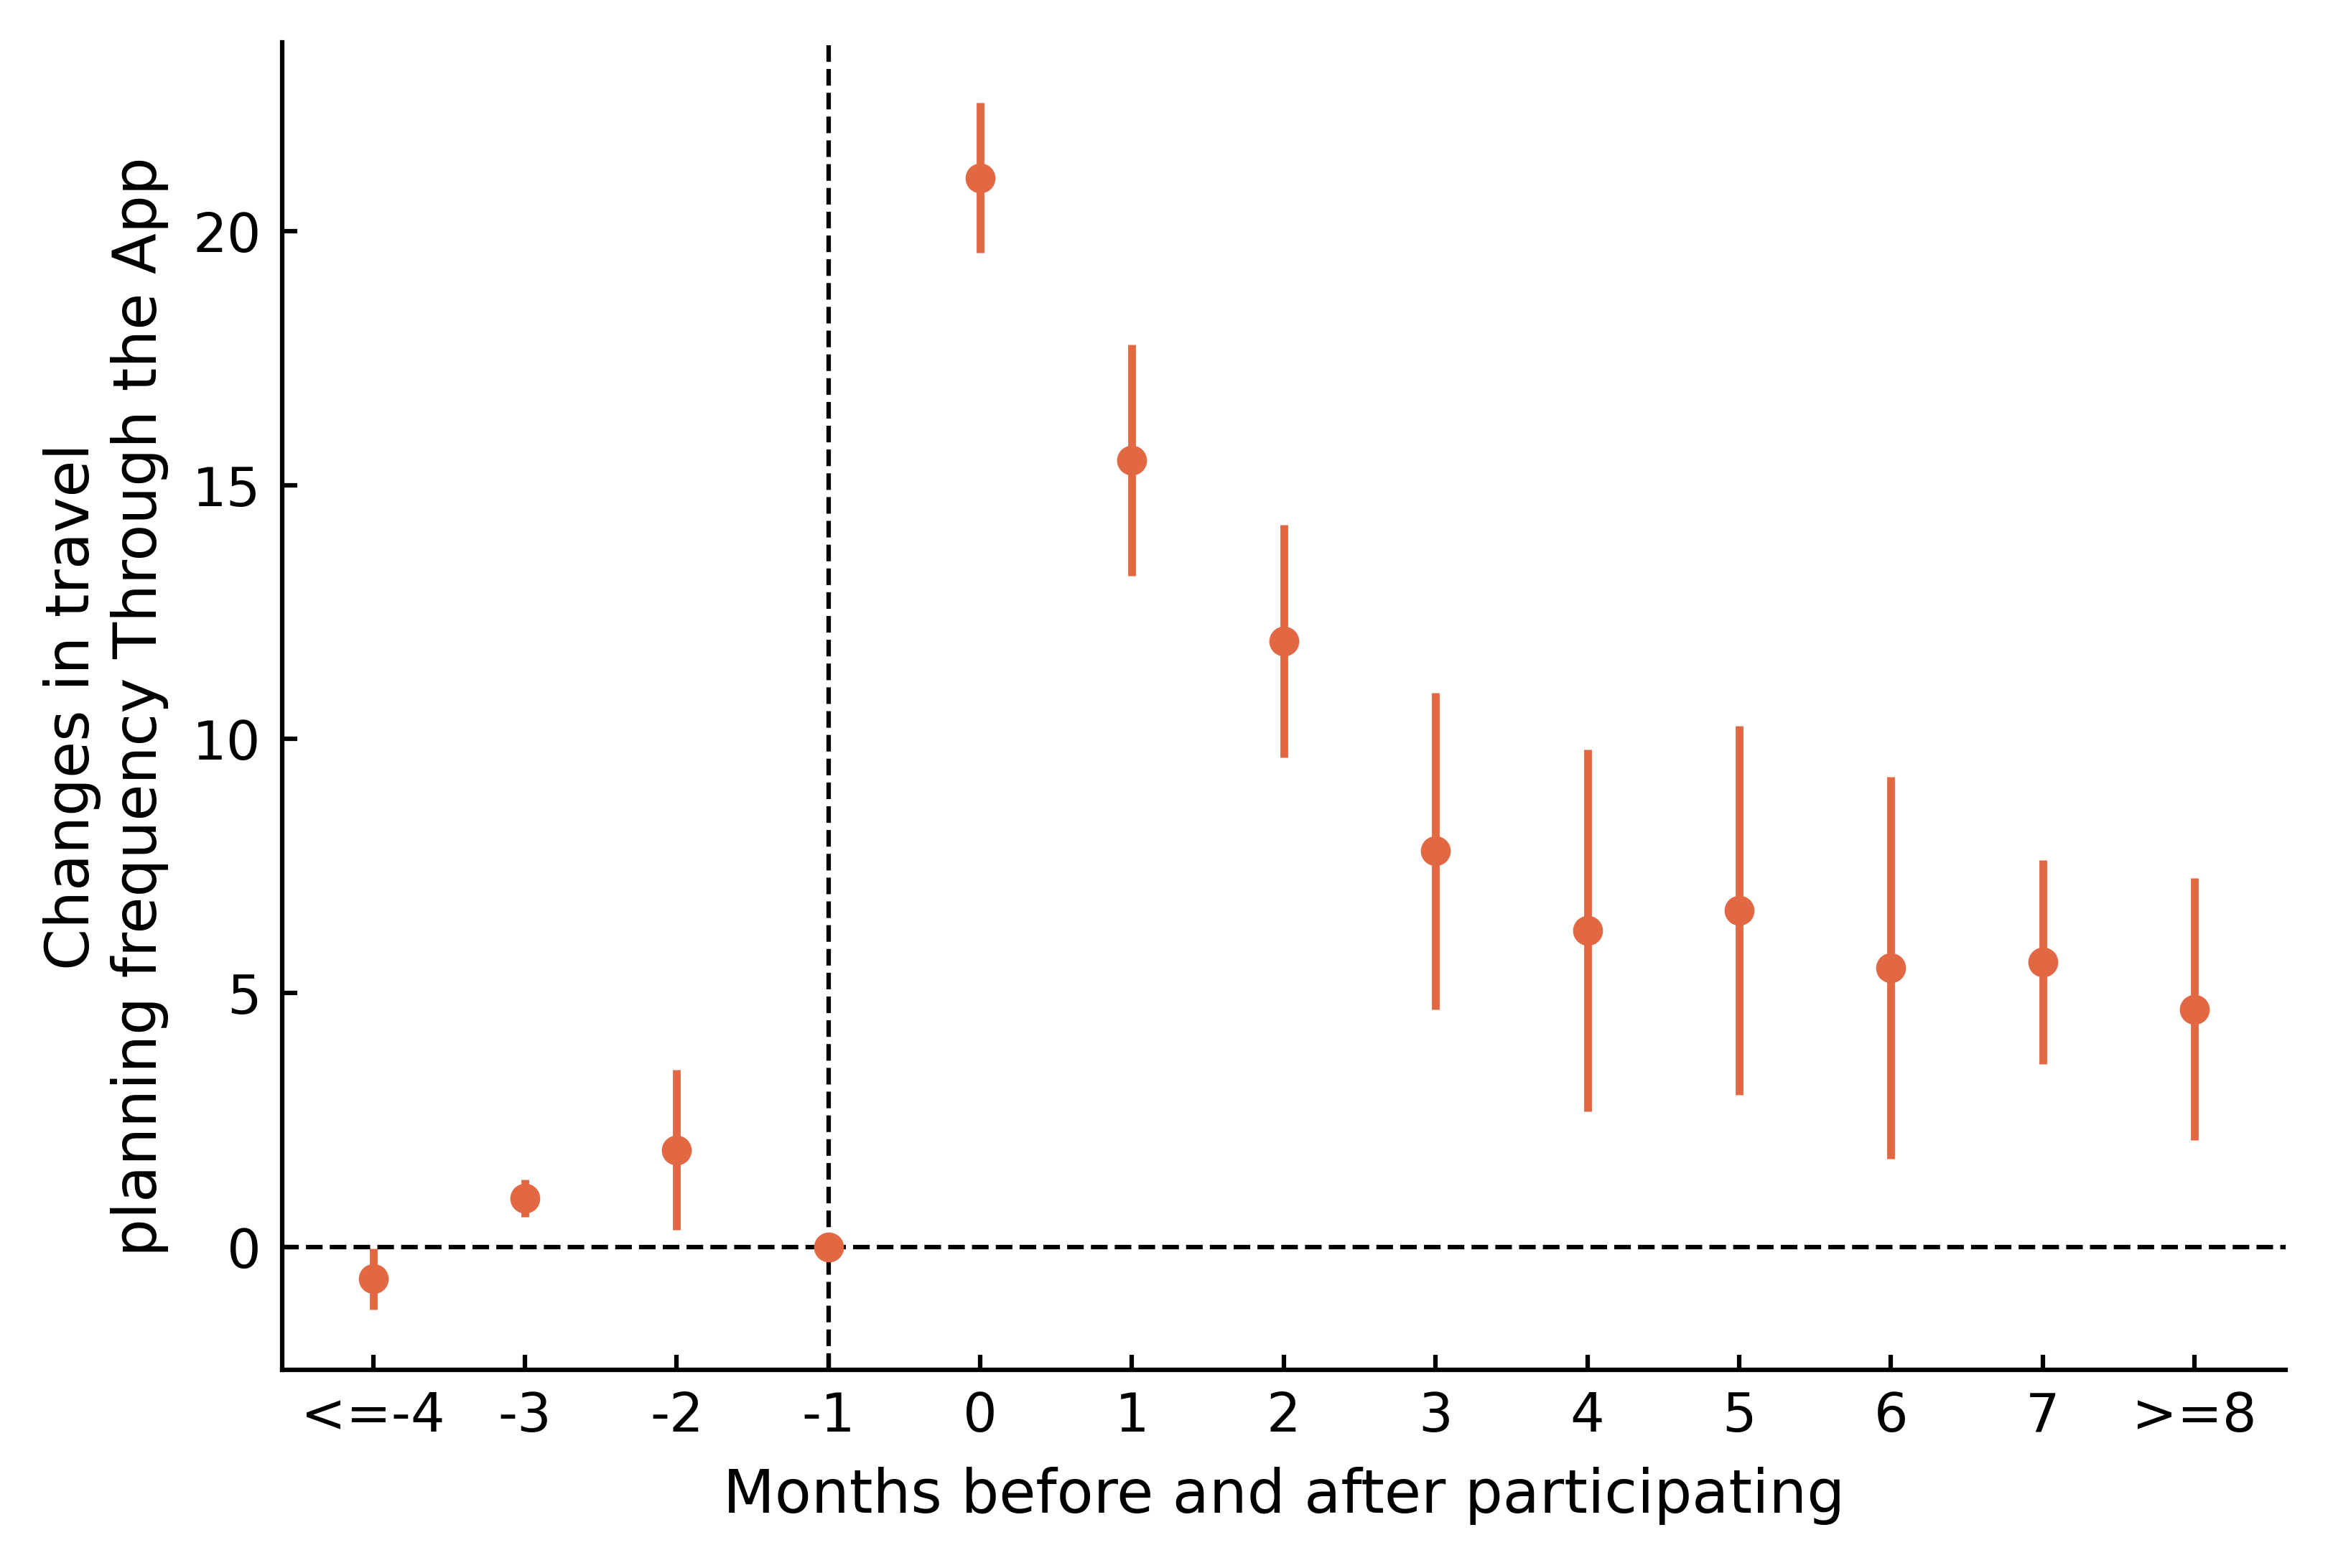

In [48]:


fig, ax = plt.subplots(figsize=(6,4),dpi=600)
plt.rcdefaults()

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.75
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

ax.errorbar(df['vars'], df['Parameter'], 
            yerr=[np.array(df['Parameter']) - np.array(df['Lower CI']), 
                  np.array(df['Upper CI']) - np.array(df['Parameter'])], 
            fmt='.', color='#E26844', ecolor='#E26844', capsize=0, capthick=1.3, label='Estimated Impacts',markersize=8,linewidth=1.3)


ax.axhline(y=0, color='black', linestyle='--', linewidth=.75)
ax.axvline(x=3, color='black', linestyle='--', linewidth=.75)

ax.set_xlabel('Months before and after participating',fontsize=10)
#
ax.set_xticks([0,1, 2, 3, 4, 5,6,7,8,9,10,11,12]) 
ax.set_xticklabels(['<=-4', '-3', '-2', '-1', '0','1','2','3','4','5','6','7','>=8'],fontsize=10)

ax.set_ylabel('Changes in travel\nplanning frequency Through the App',fontsize=10)
#
ax.tick_params(axis='both',         
            which='major',       
            length=2.5,            
            width=0.75,           
            color='black',        
            labelsize=9,        
            direction='in')    
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)  
plt.rcParams['svg.fonttype']='none'



# 9 Placebo test

In [7]:
plot_data=pd.read_csv(r'data\Placebo_test.csv')

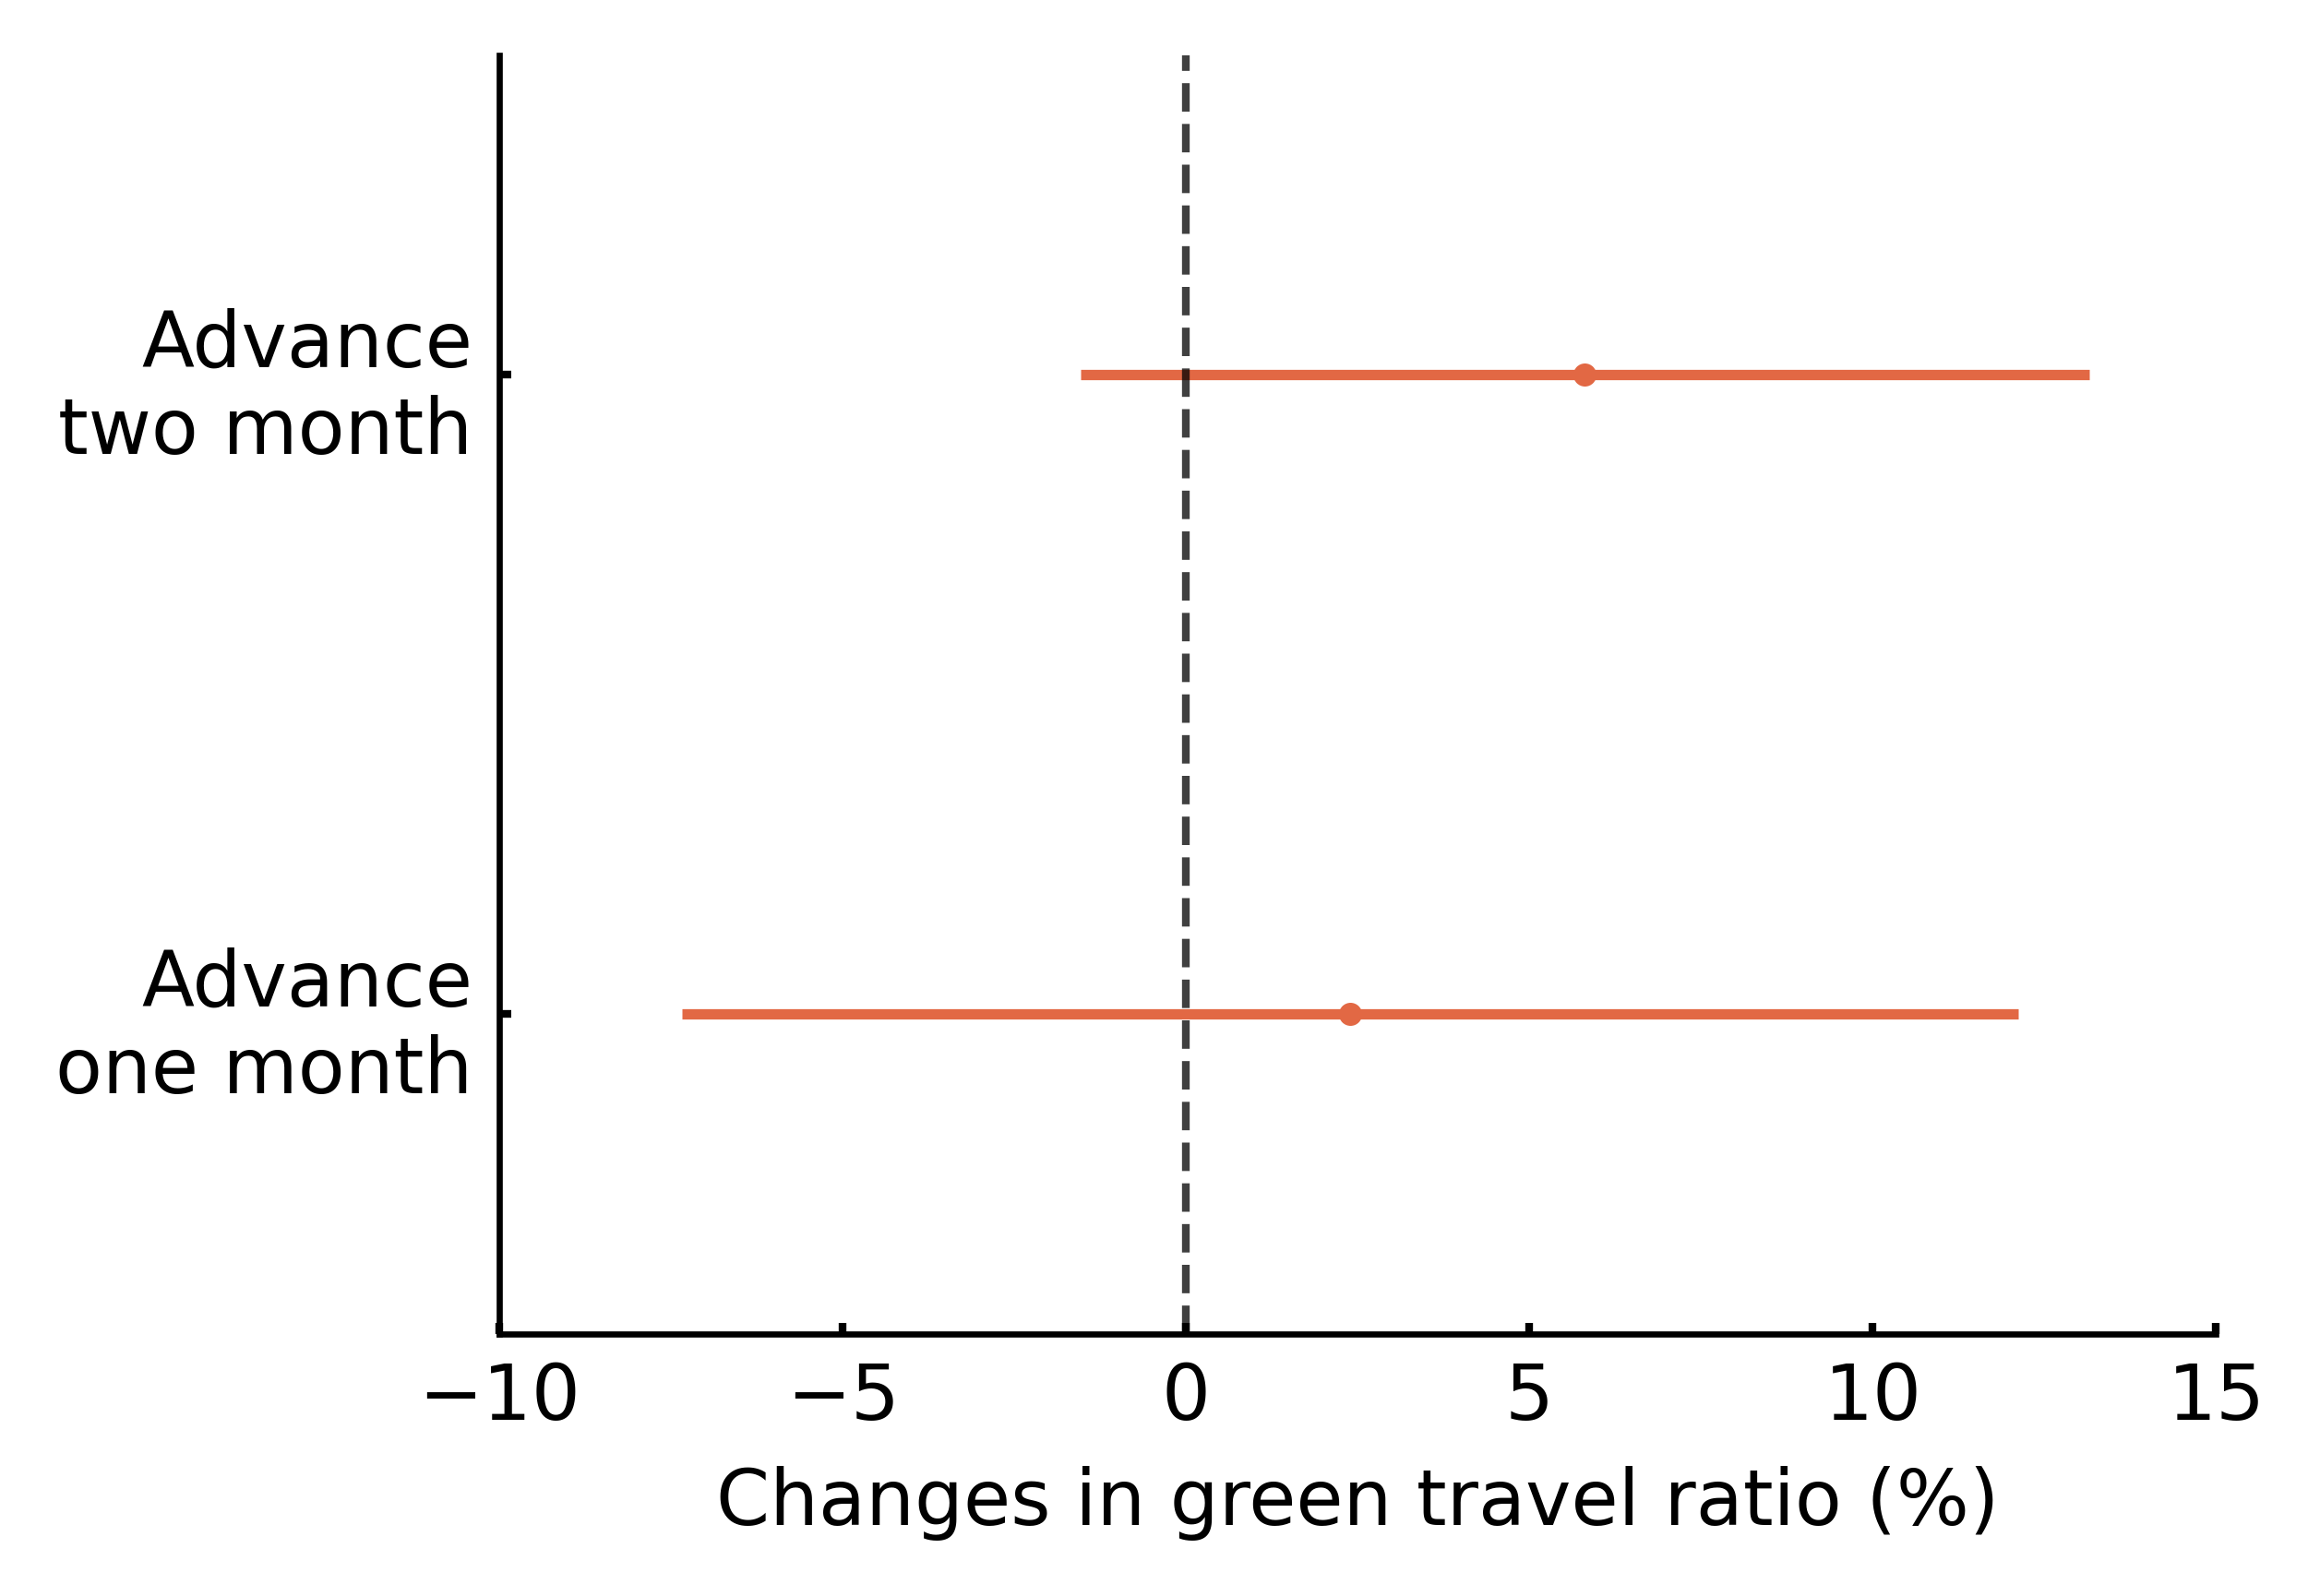

In [8]:


plt.rcdefaults()

# 创建图形和坐标轴，调整尺寸和分辨率
fig, ax = plt.subplots(figsize=(4, 3), dpi=600)

# 配置绘图参数
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] =1
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# 计算误差条的左右界限（根据估计值与置信区间下限和上限的差值）
xerr = [plot_data['Estimate'] - plot_data['CI Lower'], 
        plot_data['CI Upper'] - plot_data['Estimate']]

# 绘制带误差条的点图
ax.errorbar(plot_data['Estimate'], [0.5, 1.5], xerr=xerr, fmt='.', color='#E26844', 
            ecolor='#E26844', capsize=3, elinewidth=1.35, alpha=1,markeredgewidth=0)

# 添加X轴标签
ax.set_xlabel('Changes in green travel ratio (%)', fontsize=10)

# 设置Y轴范围和刻度
ax.set_ylim(0, 2)
ax.set_yticks([0.5, 1.5])  # 设置y轴的刻度位置
ax.set_yticklabels(['Advance\none month', 'Advance\ntwo month'], fontsize=10)

# 设置X轴范围
ax.set_xlim(-10, 15)



# 设置刻度线和标签的样式
ax.tick_params(axis='both', which='major', length=1.5, width=1, 
               color='black', labelsize=10, direction='in')

# 隐藏图表的上边框和右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 添加x=0的竖线
ax.axvline(x=0, color='black', linewidth=1, linestyle='--',alpha=0.75)

# 设置SVG字体嵌入选项
plt.rcParams['svg.fonttype'] = 'none'

